# Phase 2: Expressive Techniques Classification 

## A) "Initial experiments"

### Recreate our baseline architecture (cred: Stefani et. al.)

In [1]:
# Step 1: Gather Dependencies (ensure these are installed)
import numpy as np
import librosa
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from sklearn.model_selection import KFold

# ==============================================================================
# Step 2: Prepare Your Data Pipeline
# ==============================================================================

def extract_features_from_audio(file_path, n_mfcc=20, n_chroma=12, n_spectral_contrast=7):
    """
    Extracts a 180-dimensional feature vector from an audio file.
    This is an example implementation; the exact features should be tuned.

    To get to 180 dimensions, we concatenate:
    - MFCC (mean + std) = 20 * 2 = 40
    - Chroma STFT (mean + std) = 12 * 2 = 24
    - Spectral Contrast (mean + std) = 7 * 2 = 14
    - Spectral Centroid (mean + std) = 1 * 2 = 2
    - Spectral Bandwidth (mean + std) = 1 * 2 = 2
    - Spectral Rolloff (mean + std) = 1 * 2 = 2
    - Zero Crossing Rate (mean + std) = 1 * 2 = 2
    - Mel Spectrogram (mean + std) = 128 * 1 = 128 (using only mean for this one to save space)
    Total dimensions: 40 + 24 + 14 + 2 + 2 + 2 + 2 = 86.

    To reach 180, we need more features. Let's use larger MFCCs and Mel Spectrograms.
    New plan:
    - MFCC (mean + std) = 40 * 2 = 80
    - Mel Spectrogram (mean + std) = 40 * 2 = 80
    - Chroma STFT (mean + std) = 10 * 2 = 20
    Total = 180.
    """
    try:
        y, sr = librosa.load(file_path, mono=True)

        # MFCCs (80 dims)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
        mfccs_mean = np.mean(mfccs, axis=1)
        mfccs_std = np.std(mfccs, axis=1)

        # Mel Spectrogram (80 dims)
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40)
        mel_spec_mean = np.mean(mel_spec, axis=1)
        mel_spec_std = np.std(mel_spec, axis=1)

        # Chroma Features (20 dims)
        chroma = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=10)
        chroma_mean = np.mean(chroma, axis=1)
        chroma_std = np.std(chroma, axis=1)

        # Concatenate all features to create the final 180-dim vector
        feature_vector = np.concatenate([
            mfccs_mean, mfccs_std,
            mel_spec_mean, mel_spec_std,
            chroma_mean, chroma_std
        ])

        return feature_vector
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# ==============================================================================
# Step 3: Implement Model A in TensorFlow/Keras
# ==============================================================================

def create_model_A(input_shape=(180,), num_classes=8):
    """
    Creates and compiles the Keras model described as Model A.
    """
    model = Sequential(name="Model_A_Stefani_et_al")
    model.add(InputLayer(input_shape=input_shape))

    # Four hidden layers
    for _ in range(4):
        model.add(Dense(800, activation='relu'))
        model.add(BatchNormalization())

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Create an instance of the model and print its summary
model = create_model_A()
model.summary()

2025-09-14 17:43:54.465491: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/hjpark/.venv/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
W0000 00:00:1757897038.344311 1363725 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "Model_A_Stefani_et_al"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 800)            │       144,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 800)            │         3,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 800)            │       640,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 800)            │         3,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 800)            │       640,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 800)            │         3,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 800)            │       640,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 800)            │         3,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │         6,408 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,086,408 (7.96 MB)

 Trainable params: 2,080,008 (7.93 MB)

 Non-trainable params: 6,400 (25.00 KB)

In [5]:
import tensorflow as tf

# This command lists all physical devices visible to TensorFlow
gpu_devices = tf.config.list_physical_devices('GPU')

if gpu_devices:
    print(f"TensorFlow has found {len(gpu_devices)} GPU(s):")
    for device in gpu_devices:
        print(f" - {device}")
    # When you run your training, TensorFlow will automatically print
    # log messages indicating it's creating tensors on the GPU.
else:
    print("‼️ TensorFlow did NOT find any GPUs.")
    print("Training will run on the CPU, which will be much slower.")


TensorFlow has found 8 GPU(s):
 - PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
 - PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')
 - PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU')
 - PhysicalDevice(name='/physical_device:GPU:3', device_type='GPU')
 - PhysicalDevice(name='/physical_device:GPU:4', device_type='GPU')
 - PhysicalDevice(name='/physical_device:GPU:5', device_type='GPU')
 - PhysicalDevice(name='/physical_device:GPU:6', device_type='GPU')
 - PhysicalDevice(name='/physical_device:GPU:7', device_type='GPU')


In [5]:
# ==============================================================================
# Step 4: Data Loading, Splitting, and Training (Full Implementation)
# ==============================================================================
import os
import json
from tqdm import tqdm
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs('models', exist_ok=True)

def load_and_split_data(data_dir, folds_json_path):
    """
    Loads all audio, extracts features, and splits data according to a JSON file.
    """
    # 1. Create a mapping from class name (folder name) to integer index
    label_names = sorted([d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))])
    label_map = {name: i for i, name in enumerate(label_names)}
    print(f"Found {len(label_map)} classes: {label_names}")

    # 2. Process ALL wav files and store features/labels in a dictionary.
    #    This pre-computation makes it easy to look up data for the splits later.
    all_data = {}
    print("\nProcessing all audio files... this may take a while.")
    for label_name, label_idx in label_map.items():
        class_dir = os.path.join(data_dir, label_name)
        for fname in tqdm(os.listdir(class_dir), desc=f"Processing '{label_name}'"):
            if fname.endswith('.wav'):
                fpath = os.path.join(class_dir, fname)
                feature_vec = extract_features_from_audio(fpath)
                if feature_vec is not None and feature_vec.shape[0] == 180:
                    # Store feature vector and label index, keyed by the simple filename
                    all_data[fname] = (feature_vec, label_idx)

    print(f"\nSuccessfully processed {len(all_data)} audio files.")

    # 3. Load the JSON file that defines the train/test splits
    with open(folds_json_path, 'r') as f:
        splits = json.load(f)
    
    # 4. Create the dataset for each fold using the pre-computed features
    folded_data = []
    print("Building datasets for each fold based on JSON splits...")
    for fold_name in sorted(splits.keys()):
        train_files = splits[fold_name]['train']
        test_files = splits[fold_name]['test']

        X_train, y_train = [], []
        for fname in train_files:
            if fname in all_data:
                features, label = all_data[fname]
                X_train.append(features)
                y_train.append(label)

        X_test, y_test = [], []
        for fname in test_files:
            if fname in all_data:
                features, label = all_data[fname]
                X_test.append(features)
                y_test.append(label)
        
        folded_data.append({
            'fold_name': fold_name,
            'X_train': np.array(X_train), 'y_train': np.array(y_train),
            'X_test': np.array(X_test), 'y_test': np.array(y_test)
        })
        print(f" -> Loaded {fold_name}: {len(X_train)} train samples, {len(X_test)} test samples.")
        
    return folded_data, len(label_map)

# --- Main Execution ---
DATA_ROOT = "/data/akshaj/MusicAI/magcil/guitar_set_dataset-v1.0.0/magcil-guitar_style_dataset-eb27d7b/data/wav/" 
FOLDS_JSON = "/data/akshaj/MusicAI/magcil/guitar_set_dataset-v1.0.0/magcil-guitar_style_dataset-eb27d7b/data/folds.json" 

try:
    all_folded_data, num_classes = load_and_split_data(DATA_ROOT, FOLDS_JSON)
    
    # --- Training Loop ---
    histories = []
    for i, fold in enumerate(all_folded_data):
        print(f"\n----------- TRAINING FOLD {i+1}/{len(all_folded_data)} ({fold['fold_name']}) -----------")
        
        X_train, y_train = fold['X_train'], fold['y_train']
        X_test, y_test = fold['X_test'], fold['y_test']
        
        # One-hot encode the labels for the current fold
        y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
        y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)
        
        # Create a new, fresh model for each fold to avoid information leakage
        model = create_model_A(num_classes=num_classes)

        # This will save the best model of this fold to a uniquely named file
        checkpoint_filepath = f'models/best_model_fold_{i+1}.h5'
        model_checkpoint_callback = ModelCheckpoint(
            filepath=checkpoint_filepath,
            save_weights_only=False,  # Save the full model (architecture + weights)
            monitor='val_accuracy',   # The metric to monitor
            mode='max',               # We want to MAXIMIZE accuracy
            save_best_only=True,      # Only save when the metric improves
            verbose=1)

        # Fit data to model, now including the callback
        history = model.fit(X_train, y_train_cat,
                            batch_size=64,
                            epochs=50, 
                            validation_data=(X_test, y_test_cat),
                            verbose=1,
                            callbacks=[model_checkpoint_callback]) # Pass the callback here
        
        histories.append(history)

    print("\n✅ Completed cross-validation training.")

except FileNotFoundError:
    print("="*60)
    print("‼️ ERROR: Data directory or folds.json not found.")
    print(f"Please ensure your data is in a folder named '{DATA_ROOT}'")
    print(f"and your splits file is at '{FOLDS_JSON}'.")
    print("Cannot proceed with training.")
    print("="*60)

Found 9 classes: ['alternate picking', 'bend', 'hammer on', 'legato', 'pull off', 'slide', 'sweep picking', 'tapping', 'vibrato']

Processing all audio files... this may take a while.


Processing 'alternate picking':   0%|          | 0/81 [00:00<?, ?it/s]

Processing 'vibrato': 100%|██████████| 54/54 [00:03<00:00, 16.64it/s]
/home/hjpark/.venv/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



Successfully processed 549 audio files.
Building datasets for each fold based on JSON splits...
 -> Loaded fold_0: 441 train samples, 108 test samples.
 -> Loaded fold_1: 441 train samples, 108 test samples.
 -> Loaded fold_2: 441 train samples, 108 test samples.
 -> Loaded fold_3: 441 train samples, 108 test samples.
 -> Loaded fold_4: 441 train samples, 108 test samples.

----------- TRAINING FOLD 1/5 (fold_0) -----------
Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4923 - loss: 1.6791
Epoch 1: val_accuracy improved from None to 0.09259, saving model to models/best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.6599 - loss: 1.1924 - val_accuracy: 0.0926 - val_loss: 25.5798
Epoch 2/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9051 - loss: 0.3141
Epoch 2: val_accuracy did not improve from 0.09259
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8912 - loss: 0.3320 - val_accuracy: 0.0833 - val_loss: 27.4443
Epoch 3/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9044 - loss: 0.3521 
Epoch 3: val_accuracy improved from 0.09259 to 0.11111, saving model to models/best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9138 - loss: 0.3111 - val_accuracy: 0.1111 - val_loss: 24.5209
Epoch 4/50
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9626 - loss: 0.1057
Epoch 4: val_accuracy did not improve from 0.11111
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9501 - loss: 0.1616 - val_accuracy: 0.0926 - val_loss: 21.7756
Epoch 5/50
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9502 - loss: 0.0963
Epoch 5: val_accuracy did not improve from 0.11111
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9501 - loss: 0.1332 - val_accuracy: 0.0926 - val_loss: 19.2564
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9731 - loss: 0.0669
Epoch 6: val_accuracy did not improve from 0.11111
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9615 - loss: 0.1005 - val_accuracy: 0.1019 - val_loss: 16.3359
Epoch 7/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9774 - loss: 0.0745
Epoch 7: val_accuracy did not improve from 0.11111
7/7 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9864 - loss: 0.0409 - val_accuracy: 0.1204 - val_loss: 11.7357
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9864 - loss: 0.0404
Epoch 9: val_accuracy improved from 0.12037 to 0.15741, saving model to models/best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.9909 - loss: 0.0283 - val_accuracy: 0.1574 - val_loss: 10.2831
Epoch 10/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9871 - loss: 0.0357
Epoch 10: val_accuracy improved from 0.15741 to 0.24074, saving model to models/best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9819 - loss: 0.0484 - val_accuracy: 0.2407 - val_loss: 7.9430
Epoch 11/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9884 - loss: 0.0282
Epoch 11: val_accuracy improved from 0.24074 to 0.26852, saving model to models/best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9841 - loss: 0.0440 - val_accuracy: 0.2685 - val_loss: 6.0055
Epoch 12/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9851 - loss: 0.0347
Epoch 12: val_accuracy improved from 0.26852 to 0.34259, saving model to models/best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9841 - loss: 0.0375 - val_accuracy: 0.3426 - val_loss: 5.4925
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9871 - loss: 0.0294
Epoch 13: val_accuracy did not improve from 0.34259
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9841 - loss: 0.0396 - val_accuracy: 0.3426 - val_loss: 4.9791
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9825 - loss: 0.0298
Epoch 14: val_accuracy improved from 0.34259 to 0.37963, saving model to models/best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.9819 - loss: 0.0454 - val_accuracy: 0.3796 - val_loss: 4.2313
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9839 - loss: 0.0327
Epoch 15: val_accuracy did not improve from 0.37963
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9887 - loss: 0.0274 - val_accuracy: 0.3519 - val_loss: 4.0149
Epoch 16/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9928 - loss: 0.0128
Epoch 16: val_accuracy did not improve from 0.37963
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9864 - loss: 0.0266 - val_accuracy: 0.3796 - val_loss: 3.5607
Epoch 17/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9958 - loss: 0.0183
Epoch 17: val_accuracy improved from 0.37963 to 0.40741, saving model to models/best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9932 - loss: 0.0257 - val_accuracy: 0.4074 - val_loss: 3.1466
Epoch 18/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9886 - loss: 0.0259
Epoch 18: val_accuracy improved from 0.40741 to 0.50000, saving model to models/best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9887 - loss: 0.0199 - val_accuracy: 0.5000 - val_loss: 2.4091
Epoch 19/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9915 - loss: 0.0103
Epoch 19: val_accuracy did not improve from 0.50000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9932 - loss: 0.0132 - val_accuracy: 0.5000 - val_loss: 2.1586
Epoch 20/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9930 - loss: 0.0253
Epoch 20: val_accuracy improved from 0.50000 to 0.59259, saving model to models/best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9909 - loss: 0.0300 - val_accuracy: 0.5926 - val_loss: 1.6581
Epoch 21/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9875 - loss: 0.0284
Epoch 21: val_accuracy improved from 0.59259 to 0.64815, saving model to models/best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.9864 - loss: 0.0465 - val_accuracy: 0.6481 - val_loss: 1.5307
Epoch 22/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9886 - loss: 0.0346
Epoch 22: val_accuracy improved from 0.64815 to 0.68519, saving model to models/best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.9909 - loss: 0.0314 - val_accuracy: 0.6852 - val_loss: 1.4128
Epoch 23/50
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.0094
Epoch 23: val_accuracy did not improve from 0.68519
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9909 - loss: 0.0221 - val_accuracy: 0.6296 - val_loss: 1.7874
Epoch 24/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9923 - loss: 0.0712
Epoch 24: val_accuracy did not improve from 0.68519
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9909 - loss: 0.0663 - val_accuracy: 0.6574 - val_loss: 1.3613
Epoch 25/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9868 - loss: 0.2378 
Epoch 25: val_accuracy did not improve from 0.68519
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9796 - loss: 0.1893 - val_accuracy: 0.6296 - val_loss: 1.5463
Epoch 26/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9817 - loss: 0.0471
Epoch 26: val_accuracy did not improve from 0.68519

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9864 - loss: 0.0459 - val_accuracy: 0.7500 - val_loss: 1.6716
Epoch 31/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9958 - loss: 0.0279
Epoch 31: val_accuracy improved from 0.75000 to 0.76852, saving model to models/best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9909 - loss: 0.0443 - val_accuracy: 0.7685 - val_loss: 2.0163
Epoch 32/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9907 - loss: 0.0489
Epoch 32: val_accuracy did not improve from 0.76852
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9864 - loss: 0.0775 - val_accuracy: 0.7500 - val_loss: 2.4316
Epoch 33/50
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9977 - loss: 0.0068
Epoch 33: val_accuracy did not improve from 0.76852
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9909 - loss: 0.0168 - val_accuracy: 0.7500 - val_loss: 2.3385
Epoch 34/50
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9896 - loss: 0.0191
Epoch 34: val_accuracy did not improve from 0.76852
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9773 - loss: 0.0593 - val_accuracy: 0.7685 - val_loss: 1.8652
Epoch 35/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9966 - loss: 0.0074
Epoch 35: val_accuracy did not improve from 0.76852


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9909 - loss: 0.0273 - val_accuracy: 0.7778 - val_loss: 1.6539
Epoch 37/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9960 - loss: 0.0459
Epoch 37: val_accuracy did not improve from 0.77778
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9977 - loss: 0.0283 - val_accuracy: 0.7778 - val_loss: 2.1742
Epoch 38/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.0050
Epoch 38: val_accuracy did not improve from 0.77778
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9977 - loss: 0.0138 - val_accuracy: 0.7685 - val_loss: 2.2293
Epoch 39/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9960 - loss: 0.0195
Epoch 39: val_accuracy did not improve from 0.77778
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9977 - loss: 0.0133 - val_accuracy: 0.7685 - val_loss: 1.7621
Epoch 40/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9910 - loss: 0.0450
Epoch 40: val_accuracy did not improve from 0.77778


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9909 - loss: 0.0261 - val_accuracy: 0.7870 - val_loss: 1.5153
Epoch 44/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0060
Epoch 44: val_accuracy did not improve from 0.78704
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9909 - loss: 0.0339 - val_accuracy: 0.7593 - val_loss: 1.4174
Epoch 45/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9963 - loss: 0.0085    
Epoch 45: val_accuracy did not improve from 0.78704
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9932 - loss: 0.0165 - val_accuracy: 0.7037 - val_loss: 1.7887
Epoch 46/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9954 - loss: 0.0246
Epoch 46: val_accuracy did not improve from 0.78704
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9955 - loss: 0.0291 - val_accuracy: 0.7315 - val_loss: 1.5583
Epoch 47/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9922 - loss: 0.0285
Epoch 47: val_accuracy did not improve from 0.78

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.6122 - loss: 1.3316 - val_accuracy: 0.0926 - val_loss: 23.6418
Epoch 2/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9047 - loss: 0.3066
Epoch 2: val_accuracy improved from 0.09259 to 0.12963, saving model to models/best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8934 - loss: 0.3537 - val_accuracy: 0.1296 - val_loss: 23.6784
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9254 - loss: 0.2677
Epoch 3: val_accuracy did not improve from 0.12963
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9184 - loss: 0.2390 - val_accuracy: 0.1204 - val_loss: 21.6906
Epoch 4/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9492 - loss: 0.2122
Epoch 4: val_accuracy did not improve from 0.12963
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9478 - loss: 0.2086 - val_accuracy: 0.1296 - val_loss: 16.6864
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9570 - loss: 0.1350
Epoch 5: val_accuracy improved from 0.12963 to 0.19444, saving model to models/best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.9683 - loss: 0.1082 - val_accuracy: 0.1944 - val_loss: 10.9480
Epoch 6/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9806 - loss: 0.0509
Epoch 6: val_accuracy did not improve from 0.19444
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9864 - loss: 0.0447 - val_accuracy: 0.1667 - val_loss: 9.2199
Epoch 7/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9920 - loss: 0.0312
Epoch 7: val_accuracy improved from 0.19444 to 0.21296, saving model to models/best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9955 - loss: 0.0237 - val_accuracy: 0.2130 - val_loss: 8.0111
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9839 - loss: 0.0650
Epoch 8: val_accuracy improved from 0.21296 to 0.22222, saving model to models/best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9841 - loss: 0.0542 - val_accuracy: 0.2222 - val_loss: 6.6527
Epoch 9/50
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9990 - loss: 0.0175
Epoch 9: val_accuracy improved from 0.22222 to 0.25000, saving model to models/best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9955 - loss: 0.0210 - val_accuracy: 0.2500 - val_loss: 6.4800
Epoch 10/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9955 - loss: 0.0472
Epoch 10: val_accuracy improved from 0.25000 to 0.33333, saving model to models/best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9887 - loss: 0.0583 - val_accuracy: 0.3333 - val_loss: 4.2463
Epoch 11/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9835 - loss: 0.1023
Epoch 11: val_accuracy did not improve from 0.33333
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9841 - loss: 0.0717 - val_accuracy: 0.3333 - val_loss: 5.2938
Epoch 12/50
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9906 - loss: 0.0256 
Epoch 12: val_accuracy improved from 0.33333 to 0.36111, saving model to models/best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9841 - loss: 0.0721 - val_accuracy: 0.3611 - val_loss: 5.4055
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9936 - loss: 0.0225
Epoch 13: val_accuracy improved from 0.36111 to 0.42593, saving model to models/best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.9887 - loss: 0.0363 - val_accuracy: 0.4259 - val_loss: 3.5801
Epoch 14/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9913 - loss: 0.0234
Epoch 14: val_accuracy did not improve from 0.42593
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9819 - loss: 0.0573 - val_accuracy: 0.3704 - val_loss: 3.9989
Epoch 15/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9912 - loss: 0.0394
Epoch 15: val_accuracy did not improve from 0.42593
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9841 - loss: 0.0776 - val_accuracy: 0.3333 - val_loss: 4.5222
Epoch 16/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9954 - loss: 0.0156
Epoch 16: val_accuracy did not improve from 0.42593
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9909 - loss: 0.0278 - val_accuracy: 0.2963 - val_loss: 4.8996
Epoch 17/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9844 - loss: 0.0408
Epoch 17: val_accuracy did not improve from 0.42593


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9977 - loss: 0.0275 - val_accuracy: 0.4630 - val_loss: 3.5504
Epoch 21/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9961 - loss: 0.0155
Epoch 21: val_accuracy improved from 0.46296 to 0.58333, saving model to models/best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9955 - loss: 0.0199 - val_accuracy: 0.5833 - val_loss: 3.4064
Epoch 22/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9997 - loss: 0.0026
Epoch 22: val_accuracy improved from 0.58333 to 0.62963, saving model to models/best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.9977 - loss: 0.0051 - val_accuracy: 0.6296 - val_loss: 3.1061
Epoch 23/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9955 - loss: 0.0210
Epoch 23: val_accuracy improved from 0.62963 to 0.65741, saving model to models/best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9932 - loss: 0.0329 - val_accuracy: 0.6574 - val_loss: 2.7994
Epoch 24/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9980 - loss: 0.0046
Epoch 24: val_accuracy did not improve from 0.65741
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9909 - loss: 0.0743 - val_accuracy: 0.6574 - val_loss: 3.1765
Epoch 25/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9994 - loss: 0.0051   
Epoch 25: val_accuracy did not improve from 0.65741
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9977 - loss: 0.0094 - val_accuracy: 0.6111 - val_loss: 1.8865
Epoch 26/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9904 - loss: 0.0255
Epoch 26: val_accuracy improved from 0.65741 to 0.72222, saving model to models/best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9887 - loss: 0.0265 - val_accuracy: 0.7222 - val_loss: 3.1021
Epoch 27/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9922 - loss: 0.0446
Epoch 27: val_accuracy did not improve from 0.72222
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9932 - loss: 0.0245 - val_accuracy: 0.7222 - val_loss: 3.8119
Epoch 28/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.0051
Epoch 28: val_accuracy did not improve from 0.72222
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 0.0073 - val_accuracy: 0.6759 - val_loss: 3.0971
Epoch 29/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9889 - loss: 0.0521
Epoch 29: val_accuracy did not improve from 0.72222
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9909 - loss: 0.0282 - val_accuracy: 0.6759 - val_loss: 2.2504
Epoch 30/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9978 - loss: 0.0091
Epoch 30: val_accuracy improved from 0.72222 to 0.74

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.9932 - loss: 0.0204 - val_accuracy: 0.7407 - val_loss: 2.2749
Epoch 31/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9922 - loss: 0.0266 
Epoch 31: val_accuracy did not improve from 0.74074
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9932 - loss: 0.0317 - val_accuracy: 0.7130 - val_loss: 3.1119
Epoch 32/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9967 - loss: 0.0183
Epoch 32: val_accuracy improved from 0.74074 to 0.76852, saving model to models/best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9932 - loss: 0.0194 - val_accuracy: 0.7685 - val_loss: 2.9845
Epoch 33/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9933 - loss: 0.0209
Epoch 33: val_accuracy did not improve from 0.76852
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9796 - loss: 0.0811 - val_accuracy: 0.7500 - val_loss: 3.4845
Epoch 34/50
3/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9922 - loss: 0.0247
Epoch 34: val_accuracy did not improve from 0.76852
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9864 - loss: 0.0421 - val_accuracy: 0.7593 - val_loss: 3.3686
Epoch 35/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9810 - loss: 0.0662
Epoch 35: val_accuracy did not improve from 0.76852
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9864 - loss: 0.0576 - val_accuracy: 0.7685 - val_loss: 3.0240
Epoch 36/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9880 - loss: 0.0570
Epoch 36: val_accuracy did not improve from 0.76852


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9864 - loss: 0.0318 - val_accuracy: 0.7778 - val_loss: 3.9606
Epoch 38/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9908 - loss: 0.0201    
Epoch 38: val_accuracy did not improve from 0.77778
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9909 - loss: 0.0206 - val_accuracy: 0.7685 - val_loss: 4.2367
Epoch 39/50
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9935 - loss: 0.0266
Epoch 39: val_accuracy did not improve from 0.77778
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9887 - loss: 0.0395 - val_accuracy: 0.7778 - val_loss: 4.1274
Epoch 40/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9831 - loss: 0.0463
Epoch 40: val_accuracy did not improve from 0.77778
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9819 - loss: 0.0548 - val_accuracy: 0.7685 - val_loss: 2.1277
Epoch 41/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9956 - loss: 0.0254
Epoch 41: val_accuracy improved from 0.77778 to 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9864 - loss: 0.0770 - val_accuracy: 0.8241 - val_loss: 1.9517
Epoch 42/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9859 - loss: 0.0235
Epoch 42: val_accuracy did not improve from 0.82407
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9864 - loss: 0.0292 - val_accuracy: 0.7778 - val_loss: 3.1594
Epoch 43/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9766 - loss: 0.0644
Epoch 43: val_accuracy did not improve from 0.82407
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9751 - loss: 0.0827 - val_accuracy: 0.7870 - val_loss: 3.1796
Epoch 44/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9786 - loss: 0.0779
Epoch 44: val_accuracy did not improve from 0.82407
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9819 - loss: 0.0667 - val_accuracy: 0.7593 - val_loss: 2.4372
Epoch 45/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9815 - loss: 0.1314
Epoch 45: val_accuracy did not improve from 0.82407


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.5873 - loss: 1.4352 - val_accuracy: 0.0833 - val_loss: 18.8707
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9355 - loss: 0.2657
Epoch 2: val_accuracy improved from 0.08333 to 0.24074, saving model to models/best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.9093 - loss: 0.3373 - val_accuracy: 0.2407 - val_loss: 18.9908
Epoch 3/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9263 - loss: 0.1859
Epoch 3: val_accuracy did not improve from 0.24074
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9184 - loss: 0.2312 - val_accuracy: 0.1481 - val_loss: 17.2420
Epoch 4/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9429 - loss: 0.1230
Epoch 4: val_accuracy did not improve from 0.24074
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9274 - loss: 0.2231 - val_accuracy: 0.1204 - val_loss: 15.8915
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9552 - loss: 0.1246
Epoch 5: val_accuracy did not improve from 0.24074
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9501 - loss: 0.1552 - val_accuracy: 0.1204 - val_loss: 14.5081
Epoch 6/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9701 - loss: 0.0607
Epoch 6: val_accuracy did not improve from 0.24074
7/7 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9864 - loss: 0.0383 - val_accuracy: 0.3056 - val_loss: 7.6544
Epoch 10/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9922 - loss: 0.0313
Epoch 10: val_accuracy improved from 0.30556 to 0.32407, saving model to models/best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9909 - loss: 0.0443 - val_accuracy: 0.3241 - val_loss: 6.8952
Epoch 11/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9969 - loss: 0.0150
Epoch 11: val_accuracy improved from 0.32407 to 0.38889, saving model to models/best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9909 - loss: 0.0343 - val_accuracy: 0.3889 - val_loss: 6.4627
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9993 - loss: 0.0166
Epoch 12: val_accuracy did not improve from 0.38889
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9977 - loss: 0.0327 - val_accuracy: 0.3611 - val_loss: 6.7419
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9880 - loss: 0.0638
Epoch 13: val_accuracy did not improve from 0.38889
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9864 - loss: 0.0572 - val_accuracy: 0.3333 - val_loss: 4.9347
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9887 - loss: 0.0457
Epoch 14: val_accuracy did not improve from 0.38889
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9819 - loss: 0.0685 - val_accuracy: 0.3426 - val_loss: 4.7997
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9838 - loss: 0.0409
Epoch 15: val_accuracy improved from 0.38889 to 0.39

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9819 - loss: 0.0422 - val_accuracy: 0.3981 - val_loss: 3.9500
Epoch 16/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9862 - loss: 0.0463
Epoch 16: val_accuracy improved from 0.39815 to 0.43519, saving model to models/best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9864 - loss: 0.0551 - val_accuracy: 0.4352 - val_loss: 3.5221
Epoch 17/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9803 - loss: 0.0953
Epoch 17: val_accuracy improved from 0.43519 to 0.51852, saving model to models/best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9796 - loss: 0.0710 - val_accuracy: 0.5185 - val_loss: 2.6768
Epoch 18/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9976 - loss: 0.0226
Epoch 18: val_accuracy improved from 0.51852 to 0.62037, saving model to models/best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.9955 - loss: 0.0249 - val_accuracy: 0.6204 - val_loss: 2.4499
Epoch 19/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9909 - loss: 0.0457
Epoch 19: val_accuracy did not improve from 0.62037
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9841 - loss: 0.0624 - val_accuracy: 0.5833 - val_loss: 2.1765
Epoch 20/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9961 - loss: 0.0118
Epoch 20: val_accuracy did not improve from 0.62037
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9932 - loss: 0.0152 - val_accuracy: 0.5926 - val_loss: 2.4188
Epoch 21/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9990 - loss: 0.0072
Epoch 21: val_accuracy improved from 0.62037 to 0.64815, saving model to models/best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9977 - loss: 0.0114 - val_accuracy: 0.6481 - val_loss: 2.2962
Epoch 22/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0047
Epoch 22: val_accuracy improved from 0.64815 to 0.68519, saving model to models/best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 1.0000 - loss: 0.0081 - val_accuracy: 0.6852 - val_loss: 2.0395
Epoch 23/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9989 - loss: 0.0060
Epoch 23: val_accuracy did not improve from 0.68519
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9977 - loss: 0.0085 - val_accuracy: 0.6759 - val_loss: 2.1258
Epoch 24/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9906 - loss: 0.0187    
Epoch 24: val_accuracy improved from 0.68519 to 0.69444, saving model to models/best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9909 - loss: 0.0191 - val_accuracy: 0.6944 - val_loss: 2.2225
Epoch 25/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9918 - loss: 0.0758
Epoch 25: val_accuracy did not improve from 0.69444
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9955 - loss: 0.0388 - val_accuracy: 0.6852 - val_loss: 2.1590
Epoch 26/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9980 - loss: 0.0065     
Epoch 26: val_accuracy improved from 0.69444 to 0.73148, saving model to models/best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9955 - loss: 0.0134 - val_accuracy: 0.7315 - val_loss: 1.7677
Epoch 27/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9929 - loss: 0.0107
Epoch 27: val_accuracy improved from 0.73148 to 0.75000, saving model to models/best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9977 - loss: 0.0051 - val_accuracy: 0.7500 - val_loss: 1.7100
Epoch 28/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9786 - loss: 0.0559
Epoch 28: val_accuracy improved from 0.75000 to 0.75926, saving model to models/best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9864 - loss: 0.0349 - val_accuracy: 0.7593 - val_loss: 1.5490
Epoch 29/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9972 - loss: 0.0081
Epoch 29: val_accuracy did not improve from 0.75926
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9955 - loss: 0.0120 - val_accuracy: 0.7593 - val_loss: 1.7393
Epoch 30/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9929 - loss: 0.0201
Epoch 30: val_accuracy did not improve from 0.75926
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9864 - loss: 0.0445 - val_accuracy: 0.6852 - val_loss: 2.0932
Epoch 31/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9881 - loss: 0.0182
Epoch 31: val_accuracy did not improve from 0.75926
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9864 - loss: 0.0248 - val_accuracy: 0.7407 - val_loss: 4.2415
Epoch 32/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9711 - loss: 0.1657
Epoch 32: val_accuracy did not improve from 0.75926


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9955 - loss: 0.0204 - val_accuracy: 0.7685 - val_loss: 1.7703
Epoch 43/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9993 - loss: 0.0033
Epoch 43: val_accuracy improved from 0.76852 to 0.78704, saving model to models/best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9977 - loss: 0.0054 - val_accuracy: 0.7870 - val_loss: 1.7451
Epoch 44/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9783 - loss: 0.0399
Epoch 44: val_accuracy did not improve from 0.78704
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9864 - loss: 0.0251 - val_accuracy: 0.6296 - val_loss: 3.5862
Epoch 45/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9935 - loss: 0.1182
Epoch 45: val_accuracy did not improve from 0.78704
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9955 - loss: 0.0698 - val_accuracy: 0.5741 - val_loss: 4.4116
Epoch 46/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9935 - loss: 0.0461
Epoch 46: val_accuracy did not improve from 0.78704
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9955 - loss: 0.0495 - val_accuracy: 0.6667 - val_loss: 3.3280
Epoch 47/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9951 - loss: 0.0182
Epoch 47: val_accuracy did not improve from 0.78704


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.6213 - loss: 1.3483 - val_accuracy: 0.0833 - val_loss: 32.4515
Epoch 2/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8635 - loss: 0.5028
Epoch 2: val_accuracy did not improve from 0.08333
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8662 - loss: 0.4962 - val_accuracy: 0.0833 - val_loss: 36.4725
Epoch 3/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8767 - loss: 0.4456
Epoch 3: val_accuracy improved from 0.08333 to 0.09259, saving model to models/best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8889 - loss: 0.3887 - val_accuracy: 0.0926 - val_loss: 27.3924
Epoch 4/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9598 - loss: 0.1165
Epoch 4: val_accuracy did not improve from 0.09259
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9478 - loss: 0.1472 - val_accuracy: 0.0926 - val_loss: 21.4704
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9730 - loss: 0.0857
Epoch 5: val_accuracy improved from 0.09259 to 0.10185, saving model to models/best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.9728 - loss: 0.0771 - val_accuracy: 0.1019 - val_loss: 18.6054
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9840 - loss: 0.0650
Epoch 6: val_accuracy improved from 0.10185 to 0.12037, saving model to models/best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9864 - loss: 0.0631 - val_accuracy: 0.1204 - val_loss: 15.8862
Epoch 7/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9744 - loss: 0.0757
Epoch 7: val_accuracy improved from 0.12037 to 0.15741, saving model to models/best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9751 - loss: 0.0824 - val_accuracy: 0.1574 - val_loss: 13.0680
Epoch 8/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9846 - loss: 0.0340
Epoch 8: val_accuracy improved from 0.15741 to 0.19444, saving model to models/best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9751 - loss: 0.0629 - val_accuracy: 0.1944 - val_loss: 10.4108
Epoch 9/50
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9707 - loss: 0.1413
Epoch 9: val_accuracy improved from 0.19444 to 0.22222, saving model to models/best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9796 - loss: 0.0878 - val_accuracy: 0.2222 - val_loss: 8.8939
Epoch 10/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9857 - loss: 0.0401
Epoch 10: val_accuracy improved from 0.22222 to 0.25926, saving model to models/best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9728 - loss: 0.0519 - val_accuracy: 0.2593 - val_loss: 7.6784
Epoch 11/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9710 - loss: 0.0887
Epoch 11: val_accuracy improved from 0.25926 to 0.26852, saving model to models/best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9728 - loss: 0.0920 - val_accuracy: 0.2685 - val_loss: 6.8074
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9801 - loss: 0.0503
Epoch 12: val_accuracy improved from 0.26852 to 0.29630, saving model to models/best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.9773 - loss: 0.0523 - val_accuracy: 0.2963 - val_loss: 6.0946
Epoch 13/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9810 - loss: 0.0401
Epoch 13: val_accuracy improved from 0.29630 to 0.31481, saving model to models/best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9841 - loss: 0.0399 - val_accuracy: 0.3148 - val_loss: 5.0427
Epoch 14/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9726 - loss: 0.0794
Epoch 14: val_accuracy improved from 0.31481 to 0.36111, saving model to models/best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9796 - loss: 0.0456 - val_accuracy: 0.3611 - val_loss: 4.2460
Epoch 15/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9840 - loss: 0.0597
Epoch 15: val_accuracy improved from 0.36111 to 0.38889, saving model to models/best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9841 - loss: 0.0542 - val_accuracy: 0.3889 - val_loss: 3.6246
Epoch 16/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9889 - loss: 0.0323 
Epoch 16: val_accuracy improved from 0.38889 to 0.40741, saving model to models/best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.9864 - loss: 0.0502 - val_accuracy: 0.4074 - val_loss: 3.0724
Epoch 17/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9902 - loss: 0.0276
Epoch 17: val_accuracy improved from 0.40741 to 0.43519, saving model to models/best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9887 - loss: 0.0618 - val_accuracy: 0.4352 - val_loss: 2.4656
Epoch 18/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9940 - loss: 0.0170
Epoch 18: val_accuracy improved from 0.43519 to 0.46296, saving model to models/best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9909 - loss: 0.0205 - val_accuracy: 0.4630 - val_loss: 1.9029
Epoch 19/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9874 - loss: 0.0337
Epoch 19: val_accuracy improved from 0.46296 to 0.49074, saving model to models/best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9909 - loss: 0.0328 - val_accuracy: 0.4907 - val_loss: 1.5846
Epoch 20/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9991 - loss: 0.0075
Epoch 20: val_accuracy improved from 0.49074 to 0.58333, saving model to models/best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9955 - loss: 0.0170 - val_accuracy: 0.5833 - val_loss: 1.2784
Epoch 21/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9643 - loss: 0.0595
Epoch 21: val_accuracy improved from 0.58333 to 0.64815, saving model to models/best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.9773 - loss: 0.0465 - val_accuracy: 0.6481 - val_loss: 1.2879
Epoch 22/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9996 - loss: 0.0067
Epoch 22: val_accuracy did not improve from 0.64815
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9977 - loss: 0.0131 - val_accuracy: 0.6389 - val_loss: 1.3324
Epoch 23/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9852 - loss: 0.0460
Epoch 23: val_accuracy improved from 0.64815 to 0.67593, saving model to models/best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.9864 - loss: 0.0384 - val_accuracy: 0.6759 - val_loss: 1.0655
Epoch 24/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9894 - loss: 0.0548
Epoch 24: val_accuracy improved from 0.67593 to 0.73148, saving model to models/best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9932 - loss: 0.0353 - val_accuracy: 0.7315 - val_loss: 0.9151
Epoch 25/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9916 - loss: 0.0157
Epoch 25: val_accuracy improved from 0.73148 to 0.77778, saving model to models/best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9932 - loss: 0.0160 - val_accuracy: 0.7778 - val_loss: 0.8414
Epoch 26/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9996 - loss: 0.0079
Epoch 26: val_accuracy improved from 0.77778 to 0.80556, saving model to models/best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9955 - loss: 0.0207 - val_accuracy: 0.8056 - val_loss: 0.7982
Epoch 27/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9980 - loss: 0.0076
Epoch 27: val_accuracy did not improve from 0.80556
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9932 - loss: 0.0234 - val_accuracy: 0.8056 - val_loss: 0.7783
Epoch 28/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9960 - loss: 0.0507
Epoch 28: val_accuracy did not improve from 0.80556
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9932 - loss: 0.0369 - val_accuracy: 0.8056 - val_loss: 0.8685
Epoch 29/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9932 - loss: 0.0244
Epoch 29: val_accuracy did not improve from 0.80556
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9864 - loss: 0.0437 - val_accuracy: 0.7685 - val_loss: 0.9508
Epoch 30/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9703 - loss: 0.0571
Epoch 30: val_accuracy did not improve from 0.80556


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9705 - loss: 0.0666 - val_accuracy: 0.8148 - val_loss: 0.8224
Epoch 43/50
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9935 - loss: 0.0221
Epoch 43: val_accuracy did not improve from 0.81481
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9841 - loss: 0.0371 - val_accuracy: 0.7778 - val_loss: 1.0847
Epoch 44/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9757 - loss: 0.0541
Epoch 44: val_accuracy did not improve from 0.81481
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9841 - loss: 0.0504 - val_accuracy: 0.7685 - val_loss: 1.2144
Epoch 45/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9840 - loss: 0.0774
Epoch 45: val_accuracy improved from 0.81481 to 0.82407, saving model to models/best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9841 - loss: 0.0568 - val_accuracy: 0.8241 - val_loss: 0.7845
Epoch 46/50
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9886 - loss: 0.0297
Epoch 46: val_accuracy improved from 0.82407 to 0.85185, saving model to models/best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9819 - loss: 0.0663 - val_accuracy: 0.8519 - val_loss: 0.5830
Epoch 47/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9816 - loss: 0.0463
Epoch 47: val_accuracy did not improve from 0.85185
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9796 - loss: 0.0834 - val_accuracy: 0.7685 - val_loss: 0.8859
Epoch 48/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9944 - loss: 0.0326
Epoch 48: val_accuracy did not improve from 0.85185
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9819 - loss: 0.0657 - val_accuracy: 0.7963 - val_loss: 0.9570
Epoch 49/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9942 - loss: 0.0309
Epoch 49: val_accuracy improved from 0.85185 to 0.86111, saving model to models/best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9887 - loss: 0.0445 - val_accuracy: 0.8611 - val_loss: 0.6744
Epoch 50/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9865 - loss: 0.0232
Epoch 50: val_accuracy did not improve from 0.86111
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9864 - loss: 0.0304 - val_accuracy: 0.8241 - val_loss: 0.7203

----------- TRAINING FOLD 5/5 (fold_4) -----------
Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4557 - loss: 1.8038
Epoch 1: val_accuracy improved from None to 0.12037, saving model to models/best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.6259 - loss: 1.2999 - val_accuracy: 0.1204 - val_loss: 30.3518
Epoch 2/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8715 - loss: 0.5034
Epoch 2: val_accuracy improved from 0.12037 to 0.17593, saving model to models/best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8798 - loss: 0.4385 - val_accuracy: 0.1759 - val_loss: 29.8324
Epoch 3/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9330 - loss: 0.1764
Epoch 3: val_accuracy did not improve from 0.17593
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9320 - loss: 0.2166 - val_accuracy: 0.1019 - val_loss: 30.8500
Epoch 4/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9286 - loss: 0.1799
Epoch 4: val_accuracy did not improve from 0.17593
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9410 - loss: 0.1884 - val_accuracy: 0.1481 - val_loss: 22.8397
Epoch 5/50
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9512 - loss: 0.1510
Epoch 5: val_accuracy did not improve from 0.17593
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9592 - loss: 0.1332 - val_accuracy: 0.1667 - val_loss: 17.5189
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9579 - loss: 0.1791
Epoch 6: val_accuracy improved from 0.17593 to 0.19444,

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9751 - loss: 0.0970 - val_accuracy: 0.1944 - val_loss: 13.4449
Epoch 7/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9929 - loss: 0.0327
Epoch 7: val_accuracy improved from 0.19444 to 0.26852, saving model to models/best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9841 - loss: 0.0460 - val_accuracy: 0.2685 - val_loss: 10.4414
Epoch 8/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9881 - loss: 0.0278
Epoch 8: val_accuracy did not improve from 0.26852
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9887 - loss: 0.0285 - val_accuracy: 0.2685 - val_loss: 8.4611
Epoch 9/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9931 - loss: 0.0247
Epoch 9: val_accuracy improved from 0.26852 to 0.29630, saving model to models/best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9773 - loss: 0.0616 - val_accuracy: 0.2963 - val_loss: 6.9535
Epoch 10/50
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9850 - loss: 0.0321
Epoch 10: val_accuracy improved from 0.29630 to 0.32407, saving model to models/best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9728 - loss: 0.0657 - val_accuracy: 0.3241 - val_loss: 5.9687
Epoch 11/50
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9466 - loss: 0.0931
Epoch 11: val_accuracy improved from 0.32407 to 0.37037, saving model to models/best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9728 - loss: 0.0706 - val_accuracy: 0.3704 - val_loss: 4.7338
Epoch 12/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9933 - loss: 0.0229
Epoch 12: val_accuracy improved from 0.37037 to 0.37963, saving model to models/best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.9864 - loss: 0.0351 - val_accuracy: 0.3796 - val_loss: 3.7070
Epoch 13/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9717 - loss: 0.0435
Epoch 13: val_accuracy improved from 0.37963 to 0.42593, saving model to models/best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9728 - loss: 0.0605 - val_accuracy: 0.4259 - val_loss: 3.0357
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9736 - loss: 0.1053
Epoch 14: val_accuracy did not improve from 0.42593
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9660 - loss: 0.1298 - val_accuracy: 0.3426 - val_loss: 4.6146
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9715 - loss: 0.0773
Epoch 15: val_accuracy improved from 0.42593 to 0.46296, saving model to models/best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9773 - loss: 0.0564 - val_accuracy: 0.4630 - val_loss: 3.4039
Epoch 16/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9875 - loss: 0.0666
Epoch 16: val_accuracy improved from 0.46296 to 0.50000, saving model to models/best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9773 - loss: 0.0815 - val_accuracy: 0.5000 - val_loss: 2.6873
Epoch 17/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9783 - loss: 0.0816
Epoch 17: val_accuracy improved from 0.50000 to 0.51852, saving model to models/best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9751 - loss: 0.0983 - val_accuracy: 0.5185 - val_loss: 2.4277
Epoch 18/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9820 - loss: 0.0596
Epoch 18: val_accuracy did not improve from 0.51852
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9705 - loss: 0.0929 - val_accuracy: 0.4444 - val_loss: 2.5884
Epoch 19/50
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9499 - loss: 0.1715
Epoch 19: val_accuracy improved from 0.51852 to 0.57407, saving model to models/best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9705 - loss: 0.0906 - val_accuracy: 0.5741 - val_loss: 1.9555
Epoch 20/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9858 - loss: 0.0447
Epoch 20: val_accuracy improved from 0.57407 to 0.61111, saving model to models/best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9841 - loss: 0.0415 - val_accuracy: 0.6111 - val_loss: 1.7742
Epoch 21/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9940 - loss: 0.0234
Epoch 21: val_accuracy improved from 0.61111 to 0.62037, saving model to models/best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9819 - loss: 0.0424 - val_accuracy: 0.6204 - val_loss: 1.6070
Epoch 22/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9846 - loss: 0.0371
Epoch 22: val_accuracy improved from 0.62037 to 0.64815, saving model to models/best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9864 - loss: 0.0454 - val_accuracy: 0.6481 - val_loss: 1.3080
Epoch 23/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9844 - loss: 0.0245
Epoch 23: val_accuracy improved from 0.64815 to 0.65741, saving model to models/best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.9864 - loss: 0.0266 - val_accuracy: 0.6574 - val_loss: 1.0450
Epoch 24/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9918 - loss: 0.0278
Epoch 24: val_accuracy improved from 0.65741 to 0.67593, saving model to models/best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9932 - loss: 0.0305 - val_accuracy: 0.6759 - val_loss: 1.1535
Epoch 25/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9848 - loss: 0.0418
Epoch 25: val_accuracy improved from 0.67593 to 0.68519, saving model to models/best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.9864 - loss: 0.0402 - val_accuracy: 0.6852 - val_loss: 1.1074
Epoch 26/50
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9951 - loss: 0.0196
Epoch 26: val_accuracy improved from 0.68519 to 0.73148, saving model to models/best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9864 - loss: 0.0411 - val_accuracy: 0.7315 - val_loss: 1.0599
Epoch 27/50
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9954 - loss: 0.0142    
Epoch 27: val_accuracy improved from 0.73148 to 0.75926, saving model to models/best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9887 - loss: 0.0287 - val_accuracy: 0.7593 - val_loss: 1.0111
Epoch 28/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9933 - loss: 0.0161
Epoch 28: val_accuracy improved from 0.75926 to 0.77778, saving model to models/best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.9932 - loss: 0.0234 - val_accuracy: 0.7778 - val_loss: 0.8367
Epoch 29/50
5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9958 - loss: 0.0086
Epoch 29: val_accuracy improved from 0.77778 to 0.78704, saving model to models/best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9909 - loss: 0.0236 - val_accuracy: 0.7870 - val_loss: 0.9257
Epoch 30/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9935 - loss: 0.0440
Epoch 30: val_accuracy did not improve from 0.78704
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9955 - loss: 0.0332 - val_accuracy: 0.7315 - val_loss: 1.0740
Epoch 31/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9925 - loss: 0.0345
Epoch 31: val_accuracy did not improve from 0.78704
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9887 - loss: 0.0507 - val_accuracy: 0.7685 - val_loss: 1.0603
Epoch 32/50
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9990 - loss: 0.0038    
Epoch 32: val_accuracy did not improve from 0.78704
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9887 - loss: 0.0416 - val_accuracy: 0.7778 - val_loss: 0.9878
Epoch 33/50
4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9990 - loss: 0.0062
Epoch 33: val_accuracy did not improve from 0.78

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.9841 - loss: 0.0379 - val_accuracy: 0.8056 - val_loss: 0.8294
Epoch 35/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9938 - loss: 0.0209
Epoch 35: val_accuracy did not improve from 0.80556
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9841 - loss: 0.0529 - val_accuracy: 0.7500 - val_loss: 1.1622
Epoch 36/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9876 - loss: 0.0464
Epoch 36: val_accuracy improved from 0.80556 to 0.81481, saving model to models/best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9841 - loss: 0.0676 - val_accuracy: 0.8148 - val_loss: 1.1417
Epoch 37/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9955 - loss: 0.0178 
Epoch 37: val_accuracy improved from 0.81481 to 0.82407, saving model to models/best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9909 - loss: 0.0490 - val_accuracy: 0.8241 - val_loss: 1.1339
Epoch 38/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9961 - loss: 0.0124
Epoch 38: val_accuracy did not improve from 0.82407
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9932 - loss: 0.0215 - val_accuracy: 0.7130 - val_loss: 1.4326
Epoch 39/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9976 - loss: 0.0087
Epoch 39: val_accuracy did not improve from 0.82407
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9955 - loss: 0.0151 - val_accuracy: 0.7037 - val_loss: 1.8725
Epoch 40/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9935 - loss: 0.0256
Epoch 40: val_accuracy did not improve from 0.82407
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9864 - loss: 0.0484 - val_accuracy: 0.7130 - val_loss: 1.7759
Epoch 41/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9858 - loss: 0.0441
Epoch 41: val_accuracy did not improve from 0.82407


### Baseline + regularization techniques

In [12]:
# ==============================================================================
# Step 1: All Imports
# ==============================================================================
import os
import json
import numpy as np
import librosa
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import KFold
from tqdm import tqdm

# ==============================================================================
# Step 2: Feature Extraction Function
# ==============================================================================
def extract_features_from_audio(file_path, n_mfcc=40, n_mels=40, n_chroma=10):
    """
    Extracts a 180-dimensional feature vector from an audio file.
    This combines the mean and standard deviation of MFCCs, Mel Spectrograms,
    and Chroma features to create the final vector.
    """
    try:
        y, sr = librosa.load(file_path, mono=True)
        
        # MFCCs (mean + std = 80 dims)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        mfccs_mean = np.mean(mfccs, axis=1)
        mfccs_std = np.std(mfccs, axis=1)

        # Mel Spectrogram (mean + std = 80 dims)
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
        mel_spec_mean = np.mean(mel_spec, axis=1)
        mel_spec_std = np.std(mel_spec, axis=1)

        # Chroma Features (mean + std = 20 dims)
        chroma = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=n_chroma)
        chroma_mean = np.mean(chroma, axis=1)
        chroma_std = np.std(chroma, axis=1)

        # Concatenate all features to create the final 180-dim vector
        feature_vector = np.concatenate([
            mfccs_mean, mfccs_std,
            mel_spec_mean, mel_spec_std,
            chroma_mean, chroma_std
        ])
        return feature_vector
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# ==============================================================================
# Step 3: Regularized Model Creation Function
# ==============================================================================
def create_model_A(input_shape=(180,), num_classes=9, dropout_rate=0.4, l2_lambda=1e-4):
    """
    Creates and compiles the Keras model with Dropout and L2 regularization.
    """
    model = Sequential(name="Model_A_Regularized")
    model.add(InputLayer(input_shape=input_shape))

    # Four hidden layers with regularization
    for _ in range(4):
        model.add(Dense(800, activation='relu', kernel_regularizer=l2(l2_lambda)))
        model.add(BatchNormalization())
        model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# ==============================================================================
# Step 4: Data Loading and Splitting Function
# ==============================================================================
def load_and_split_data(data_dir, folds_json_path):
    """
    Loads all audio, extracts features, and splits data according to a JSON file.
    """
    label_names = sorted([d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))])
    label_map = {name: i for i, name in enumerate(label_names)}
    print(f"Found {len(label_map)} classes: {label_names}")

    all_data = {}
    print("\nProcessing all audio files... this may take a while.")
    for label_name, label_idx in label_map.items():
        class_dir = os.path.join(data_dir, label_name)
        for fname in tqdm(os.listdir(class_dir), desc=f"Processing '{label_name}'"):
            if fname.endswith('.wav'):
                fpath = os.path.join(class_dir, fname)
                feature_vec = extract_features_from_audio(fpath)
                if feature_vec is not None and feature_vec.shape[0] == 180:
                    all_data[fname] = (feature_vec, label_idx)

    print(f"\nSuccessfully processed {len(all_data)} audio files.")

    with open(folds_json_path, 'r') as f:
        splits = json.load(f)
    
    folded_data = []
    print("Building datasets for each fold based on JSON splits...")
    for fold_name in sorted(splits.keys()):
        train_files = splits[fold_name]['train']
        test_files = splits[fold_name]['test']

        X_train, y_train = [], []
        for fname in train_files:
            if fname in all_data:
                features, label = all_data[fname]
                X_train.append(features)
                y_train.append(label)

        X_test, y_test = [], []
        for fname in test_files:
            if fname in all_data:
                features, label = all_data[fname]
                X_test.append(features)
                y_test.append(label)
        
        folded_data.append({
            'fold_name': fold_name,
            'X_train': np.array(X_train), 'y_train': np.array(y_train),
            'X_test': np.array(X_test), 'y_test': np.array(y_test)
        })
        print(f" -> Loaded {fold_name}: {len(X_train)} train samples, {len(X_test)} test samples.")
        
    return folded_data, len(label_map)


In [ ]:
# ==============================================================================
# Step 5: Main Training Execution
# ==============================================================================

# --- Configuration ---
DATA_ROOT = "/data/akshaj/MusicAI/magcil/guitar_set_dataset-v1.0.0/magcil-guitar_style_dataset-eb27d7b/data/wav/" 
FOLDS_JSON = "/data/akshaj/MusicAI/magcil/guitar_set_dataset-v1.0.0/magcil-guitar_style_dataset-eb27d7b/data/folds.json" 
MODEL_OUTPUT_DIR = 'models_regularized'
os.makedirs(MODEL_OUTPUT_DIR, exist_ok=True) 

# --- Verification and Training ---
try:
    # Print model summary to verify architecture
    print("Model Architecture:")
    model_instance = create_model_A()
    model_instance.summary()

    # Load data
    all_folded_data, num_classes = load_and_split_data(DATA_ROOT, FOLDS_JSON)
    print("num_classes:", num_classes)
    
    # --- Training Loop ---
    histories = []
    for i, fold_data in enumerate(all_folded_data):
        fold_name = fold_data['fold_name']
        print(f"\n----------- TRAINING FOLD {i+1}/{len(all_folded_data)} ({fold_name}) -----------")
        
        X_train, y_train = fold_data['X_train'], fold_data['y_train']
        X_test, y_test = fold_data['X_test'], fold_data['y_test']
        
        y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
        y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)
        
        model = create_model_A(num_classes=num_classes, dropout_rate=0.5, l2_lambda=1e-3)

        checkpoint_filepath = os.path.join(MODEL_OUTPUT_DIR, f'best_model_{fold_name}.h5')
        model_checkpoint_callback = ModelCheckpoint(
            filepath=checkpoint_filepath,
            save_weights_only=False,
            monitor='val_accuracy',
            mode='max',
            save_best_only=True)
            
        early_stopping_callback = EarlyStopping(
            monitor='val_loss',
            patience=10,
            verbose=1,
            restore_best_weights=True)

        history = model.fit(X_train, y_train_cat,
                            batch_size=64,
                            epochs=1000,
                            validation_data=(X_test, y_test_cat),
                            verbose=0,
                            callbacks=[model_checkpoint_callback, early_stopping_callback])
        
        histories.append(history)

    print(f"\n✅ Completed cross-validation training. Best models saved in '{MODEL_OUTPUT_DIR}/'.")

except FileNotFoundError:
    print("="*60)
    print("‼️ ERROR: Data directory or folds.json not found.")
    print(f"Please ensure your data is in a folder named '{DATA_ROOT}'")
    print(f"and your splits file is at '{FOLDS_JSON}'.")
    print("Cannot proceed with training.")
    print("="*60)

Model Architecture:


/home/hjpark/.venv/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "Model_A_Regularized"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_65 (Dense)                │ (None, 800)            │       144,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_52          │ (None, 800)            │         3,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 800)            │       640,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_53          │ (None, 800)            │         3,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 800)            │       640,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_54          │ (None, 800)            │         3,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 800)            │       640,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_55          │ (None, 800)            │         3,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 9)              │         7,209 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,087,209 (7.96 MB)

 Trainable params: 2,080,809 (7.94 MB)

 Non-trainable params: 6,400 (25.00 KB)

Found 9 classes: ['alternate picking', 'bend', 'hammer on', 'legato', 'pull off', 'slide', 'sweep picking', 'tapping', 'vibrato']

Processing all audio files... this may take a while.


Processing 'vibrato': 100%|█████████████████████████████████████████████████████████████████| 54/54 [00:05<00:00, 10.25it/s]



Successfully processed 549 audio files.
Building datasets for each fold based on JSON splits...
 -> Loaded fold_0: 441 train samples, 108 test samples.
 -> Loaded fold_1: 441 train samples, 108 test samples.
 -> Loaded fold_2: 441 train samples, 108 test samples.
 -> Loaded fold_3: 441 train samples, 108 test samples.
 -> Loaded fold_4: 441 train samples, 108 test samples.
num_classes: 9

----------- TRAINING FOLD 1/5 (fold_0) -----------


Epoch 45: early stopping
Restoring model weights from the end of the best epoch: 35.

----------- TRAINING FOLD 2/5 (fold_1) -----------


Epoch 76: early stopping
Restoring model weights from the end of the best epoch: 66.

----------- TRAINING FOLD 3/5 (fold_2) -----------


Epoch 80: early stopping
Restoring model weights from the end of the best epoch: 70.

----------- TRAINING FOLD 4/5 (fold_3) -----------


Restoring model weights from the end of the best epoch: 100.

----------- TRAINING FOLD 5/5 (fold_4) -----------


Restoring model weights from the end of the best epoch: 95.

✅ Completed cross-validation training. Best models saved in 'models_regularized/'.


### Inference on IDMT-SMT-Guitar dataset

In [ ]:
import os
import xml.etree.ElementTree as ET
import numpy as np
import librosa
import tensorflow as tf
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tqdm import tqdm

# ==============================================================================
# 0. Configuration
# ==============================================================================

MODEL_TO_EVALUATE = '/home/hjpark/models_regularized/best_model_fold_4.h5'
IDMT_AUDIO_DIR = '/data/hjpark/IDMT-SMT-GUITAR_V2/dataset2/audio'
IDMT_XML_DIR = '/data/hjpark/IDMT-SMT-GUITAR_V2/dataset2/annotation'

MAGCIL_CLASSES = [
    'alternate picking', 'bend', 'hammer on', 'legato', 'pull off',
    'slide', 'sweep picking', 'tapping', 'vibrato', 'other'  # Ensure 'other' included
]

EVAL_CLASSES = ['bend', 'slide', 'vibrato', 'other']
EVAL_CLASS_INDICES = [MAGCIL_CLASSES.index(c) for c in EVAL_CLASSES]
OTHER_IDX = MAGCIL_CLASSES.index('other')

IDMT_TO_MAGCIL_IDX = {
    'be': MAGCIL_CLASSES.index('bend'),
    'sl': MAGCIL_CLASSES.index('slide'),
    'vi': MAGCIL_CLASSES.index('vibrato'),
    # All other common codes mapped to 'other'
    'pi': OTHER_IDX, 'ha': OTHER_IDX, 'dn': OTHER_IDX, 'no': OTHER_IDX,
    'fs': OTHER_IDX, 'mu': OTHER_IDX, # Add more if needed
}

print(f"Model evaluated on these classes: {EVAL_CLASSES}")
print(f"IDMT to model index mapping: {IDMT_TO_MAGCIL_IDX}")

# ==============================================================================
# 1. Helper Functions
# ==============================================================================

def extract_features_from_segmented_audio(y_segment, sr):
    try:
        if len(y_segment) < 2048:
            return None
        mfccs = librosa.feature.mfcc(y=y_segment, sr=sr, n_mfcc=40)
        mfccs_mean, mfccs_std = np.mean(mfccs, axis=1), np.std(mfccs, axis=1)
        mel_spec = librosa.feature.melspectrogram(y=y_segment, sr=sr, n_mels=40)
        mel_spec_mean, mel_spec_std = np.mean(mel_spec, axis=1), np.std(mel_spec, axis=1)
        chroma = librosa.feature.chroma_stft(y=y_segment, sr=sr, n_chroma=10)
        chroma_mean, chroma_std = np.mean(chroma, axis=1), np.std(chroma, axis=1)
        feature_vector = np.concatenate([
            mfccs_mean, mfccs_std, mel_spec_mean, mel_spec_std, chroma_mean, chroma_std
        ])
        return feature_vector
    except Exception:
        return None

def parse_idmt_xml(xml_path):
    try:
        tree = ET.parse(xml_path)
        root = tree.getroot()
        for event in root.findall('.//event'):
            onset_tag = event.find('onsetSec')
            offset_tag = event.find('offsetSec')
            technique_tag = event.find('expressionStyle')
            if onset_tag is not None and offset_tag is not None and technique_tag is not None:
                onset = float(onset_tag.text)
                offset = float(offset_tag.text)
                technique = technique_tag.text.lower().strip()
                yield {'onset': onset, 'offset': offset, 'technique': technique}
    except ET.ParseError:
        return

# ==============================================================================
# 2. Main Evaluation Script
# ==============================================================================

try:
    print(f"\nLoading model for evaluation: {MODEL_TO_EVALUATE}")
    model = tf.keras.models.load_model(MODEL_TO_EVALUATE)
    ground_truth_labels = []
    predicted_labels = []

    xml_files = [f for f in os.listdir(IDMT_XML_DIR) if f.endswith('.xml')]
    print(f"\nFound {len(xml_files)} XML files. Starting event-level evaluation...")

    for xml_file in tqdm(xml_files, desc="Processing Files"):
        xml_path = os.path.join(IDMT_XML_DIR, xml_file)
        audio_filename = xml_file.replace('.xml', '.wav')
        audio_path = os.path.join(IDMT_AUDIO_DIR, audio_filename)
        if not os.path.exists(audio_path): continue

        # Load audio once per file
        y_full, sr = librosa.load(audio_path, sr=None)
        for note_event in parse_idmt_xml(xml_path):
            technique_name = note_event['technique']
            # Map ALL events to class or 'other'
            ground_truth_index = IDMT_TO_MAGCIL_IDX.get(technique_name, OTHER_IDX)
            start_sample = int(note_event['onset'] * sr)
            end_sample = int(note_event['offset'] * sr)
            note_audio_segment = y_full[start_sample:end_sample]
            features = extract_features_from_segmented_audio(note_audio_segment, sr)
            if features is not None:
                features_batch = np.expand_dims(features, axis=0)
                prediction_probs = model.predict(features_batch, verbose=0)
                pred_idx = np.argmax(prediction_probs, axis=1)[0]
                # If model predicts anything outside EVAL set, map to OTHER
                if pred_idx not in EVAL_CLASS_INDICES[:-1]:  # Last is 'other'
                    pred_idx = OTHER_IDX
                ground_truth_labels.append(ground_truth_index)
                predicted_labels.append(pred_idx)

    # ==============================================================================
    # 3. Report Results
    # ==============================================================================
    print("\n--- EVALUATION COMPLETE ---")
    if not ground_truth_labels:
        print("‼️ No valid notes were found to evaluate. Check paths and the mapping.")
    else:
        print(f"Evaluated {len(ground_truth_labels)} note events.")
        print(f"Overall Accuracy: {accuracy_score(ground_truth_labels, predicted_labels):.2%}\n")
        print("Classification Report:")
        print(classification_report(
            ground_truth_labels, predicted_labels, labels=EVAL_CLASS_INDICES, target_names=EVAL_CLASSES, zero_division=0))
        print("\nConfusion Matrix:")
        print(confusion_matrix(ground_truth_labels, predicted_labels, labels=EVAL_CLASS_INDICES))

except FileNotFoundError:
    print("="*60)
    print(f"‼️ ERROR: Model or Dataset Not Found! Check paths: '{MODEL_TO_EVALUATE}', '{IDMT_AUDIO_DIR}', '{IDMT_XML_DIR}'")
    print("="*60)


### Final output is not great (shows severe distributional shift)

| Technique         | Test Precision | Test Recall | Test F1  | Test Support | Train Precision | Train Recall | Train F1 | Train Support |
|-------------------|:-------------:|:-----------:|:--------:|:------------:|:--------------:|:------------:|:--------:|:-------------:|
| bend              | 0.01          | 0.57        | 0.02     | 54           | 1.00           | 1.00         | 1.00     | 9             |
| slide             | 0.05          | 0.13        | 0.08     | 93           | 1.00           | 0.89         | 0.94     | 9             |
| vibrato           | 0.00          | 0.00        | 0.00     | 117          | 1.00           | 1.00         | 1.00     | 9             |
| alternate picking |                |             |          |              | 1.00           | 1.00         | 1.00     | 18            |
| hammer on         |                |             |          |              | 0.73           | 0.89         | 0.80     | 9             |
| legato            |                |             |          |              | 1.00           | 1.00         | 1.00     | 18            |
| pull off          |                |             |          |              | 0.86           | 0.67         | 0.75     | 9             |
| sweep picking     |                |             |          |              | 1.00           | 0.89         | 0.94     | 9             |
| tapping           |                |             |          |              | 0.90           | 1.00         | 0.95     | 18            |
| other             | 0.98           | 0.32        | 0.49     | 4013         |                |              |          |               |
|-------------------|---------------|-------------|----------|--------------|----------------|--------------|----------|---------------|
| accuracy          |               |             | 0.31     | 4277         |                |              | 0.94     | 108           |
| macro avg         | 0.26           | 0.26        | 0.15     | 4277         | 0.94           | 0.93         | 0.93     | 108           |
| weighted avg      | 0.92           | 0.31        | 0.46     | 4277         | 0.95           | 0.94         | 0.94     | 108           |
| Macro F1          |                |             |          |              |                |              | 0.9311   |               |


## B) Create a unified dataset (IDMT, AGPT, Magcil)

### 1. magcil dataset

In [9]:
import os
import shutil
from tqdm import tqdm

# --- Configuration ---

# 1. Set the path to your original MAGCIL dataset
MAGCIL_INPUT_DIR = '/data/akshaj/MusicAI/magcil/guitar_set_dataset-v1.0.0/magcil-guitar_style_dataset-eb27d7b/data/wav'

# 2. Set the path for the new, reorganized dataset
MAGCIL_OUTPUT_DIR = '/data/hjpark/magcil' # Using a new name to avoid confusion

# 3. Define the NEW mapping from original MAGCIL folder names to the new unified names.
MAGCIL_TO_UNIFIED = {
    # --- New Picking Classes (now separate) ---
    'alternate picking': 'alternate_picking',
    'sweep picking': 'sweep_picking',
    
    # --- Merged Legato Class ---
    'hammer on': 'legato',
    'pull off': 'legato',
    'legato': 'legato',
    
    # --- Direct 1-to-1 Mappings for Primary Classes ---
    'slide': 'slide',
    'bend': 'bend',
    'vibrato': 'vibrato',
    'palm mute': 'palm_mute',
    'staccato': 'staccato',
    'harmonics': 'harmonics',
    
    # NOTE: Any folder in the source directory that is NOT a key in this dictionary
    # (e.g., 'tapping') will be automatically placed in the 'other' folder.
}

# --- Main Processing Script ---

print(f"Reorganizing MAGCIL with new 11-class mapping into '{MAGCIL_OUTPUT_DIR}'")

# Start with a clean directory to ensure no old files remain
if os.path.exists(MAGCIL_OUTPUT_DIR):
    shutil.rmtree(MAGCIL_OUTPUT_DIR)
os.makedirs(MAGCIL_OUTPUT_DIR)

# Determine all unique destination folders from the mapping values
unified_classes = set(MAGCIL_TO_UNIFIED.values())
unified_classes.add('other')   # Add 'other' for any unmapped source folders

# Create all necessary destination directories
for class_name in unified_classes:
    os.makedirs(os.path.join(MAGCIL_OUTPUT_DIR, class_name), exist_ok=True)

try:
    source_class_folders = [d for d in os.listdir(MAGCIL_INPUT_DIR) if os.path.isdir(os.path.join(MAGCIL_INPUT_DIR, d))]
except FileNotFoundError:
    print(f"‼️ ERROR: Input directory not found at '{MAGCIL_INPUT_DIR}'. Please check the path.")
    source_class_folders = []

print(f"Found {len(source_class_folders)} source folders. Starting reorganization...")

# Iterate through each source folder and copy its files based on the mapping
for source_folder in tqdm(source_class_folders, desc="Processing Classes"):
    
    # Use .get() to look up the mapping. If a folder isn't in the map, default to 'other'.
    unified_class = MAGCIL_TO_UNIFIED.get(source_folder, 'other')
    
    source_path = os.path.join(MAGCIL_INPUT_DIR, source_folder)
    destination_path = os.path.join(MAGCIL_OUTPUT_DIR, unified_class)
    
    # Copy all .wav files from the source to the unified destination
    for filename in os.listdir(source_path):
        if filename.endswith('.wav'):
            shutil.copy2(os.path.join(source_path, filename), os.path.join(destination_path, filename))

if source_class_folders:
    print(f"\n✅ Reorganization complete! The new dataset is ready at '{MAGCIL_OUTPUT_DIR}'.")

Reorganizing MAGCIL with new 11-class mapping into '/data/hjpark/magcil'
Found 9 source folders. Starting reorganization...


Processing Classes: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:02<00:00,  3.36it/s]


✅ Reorganization complete! The new dataset is ready at '/data/hjpark/magcil'.


### 2. IDMT dataset

In [19]:
import os
import xml.etree.ElementTree as ET
import librosa
import soundfile as sf
from tqdm import tqdm

# --- Configuration ---
IDMT_AUDIO_DIR = '/data/hjpark/_IDMT-SMT-GUITAR_V2/dataset2/audio'
IDMT_XML_DIR = '/data/hjpark/_IDMT-SMT-GUITAR_V2/dataset2/annotation'
OUTPUT_DATA_DIR = '/data/hjpark/IDMT' # Using a new name
FIXED_WINDOW_DURATION_SEC = 0.4 # Using the 400ms window as decided

# --- NEW Unified Class Mappings for the 11-class structure ---

# Mapping for <expressionStyle> tags.
# NOTE: IDMT does not distinguish 'hammer on'/'pull off', so we don't have a 'legato' mapping here.
# 'NO' is a special case to trigger the fallback to the excitation style.
IDMT_EXPRESSION_TO_UNIFIED = {
    'BE': 'bend',
    'SL': 'slide',
    'VI': 'vibrato',
    'ST': 'staccato',
    'HA': 'harmonics',
    'NO': None,  # Special marker: If 'NO', check the excitation style instead.
}

# Mapping for <excitationStyle> tags.
# This is ONLY used if the expressionStyle was 'NO'.
# NOTE: IDMT does not distinguish 'alternate' vs 'sweep' picking. We map 'PK' to the general 'picking' class.
IDMT_EXCITATION_TO_UNIFIED = {
    'PK': 'picking',
    'MU': 'palm_mute',
}

# --- Main Processing Script ---
print(f"Processing IDMT dataset for the new 11-class structure.")
print(f"Output will be saved to '{OUTPUT_DATA_DIR}'")

# Start with a clean directory
if os.path.exists(OUTPUT_DATA_DIR):
    shutil.rmtree(OUTPUT_DATA_DIR)
os.makedirs(OUTPUT_DATA_DIR)

# Create directories for all possible unified classes, plus 'other'
all_target_classes = set(IDMT_EXPRESSION_TO_UNIFIED.values()) | set(IDMT_EXCITATION_TO_UNIFIED.values())
all_target_classes.discard(None)
all_target_classes.add('other')
# Manually add the classes that only exist in MAGCIL to ensure the folder structure is identical
all_target_classes.update(['alternate_picking', 'sweep_picking', 'legato'])

for unified_class in all_target_classes:
    os.makedirs(os.path.join(OUTPUT_DATA_DIR, unified_class), exist_ok=True)

# Main loop
try:
    xml_files = [f for f in os.listdir(IDMT_XML_DIR) if f.endswith('.xml')]
    for xml_file in tqdm(xml_files, desc="Processing XML annotations"):
        audio_file = xml_file.replace('.xml', '.wav')
        audio_path = os.path.join(IDMT_AUDIO_DIR, audio_file)
        xml_path = os.path.join(IDMT_XML_DIR, xml_file)

        if not os.path.exists(audio_path):
            continue

        y, sr = librosa.load(audio_path, sr=None)
        
        tree = ET.parse(xml_path)
        root = tree.getroot()
        event_idx = 0
        for event in root.findall('.//event'):
            expression_tag = event.find('expressionStyle')
            excitation_tag = event.find('excitationStyle')

            if expression_tag is None or excitation_tag is None:
                continue

            expression_code = expression_tag.text.strip().upper()
            excitation_code = excitation_tag.text.strip().upper()
            
            unified_class = None
            # Primary case: Check for a specific expressive technique
            if expression_code != 'NO':
                unified_class = IDMT_EXPRESSION_TO_UNIFIED.get(expression_code)
                if unified_class is None: # It's an unmapped expressive technique
                    unified_class = 'other'
            # Fallback case: If expression is 'NO', check the excitation style
            else:
                unified_class = IDMT_EXCITATION_TO_UNIFIED.get(excitation_code)
                if unified_class is None: # It's an unmapped excitation technique
                    unified_class = 'other'

            onset_sec = float(event.find('onsetSec').text)
            offset_sec = float(event.find('offsetSec').text)

            start_sample = int(onset_sec * sr)
            end_sample = start_sample + int(FIXED_WINDOW_DURATION_SEC * sr)
            end_sample = min(end_sample, len(y))
            
            segment = y[start_sample:end_sample]
            
            if len(segment) < 2048:
                continue

            fname = f"{os.path.splitext(audio_file)[0]}_{event_idx}_{unified_class}.wav"
            event_idx += 1
            
            out_dir = os.path.join(OUTPUT_DATA_DIR, unified_class)
            out_path = os.path.join(out_dir, fname)
            sf.write(out_path, segment, sr)

except FileNotFoundError:
    print(f"‼️ ERROR: Could not find IDMT directories. Check paths for audio ('{IDMT_AUDIO_DIR}') and XML ('{IDMT_XML_DIR}').")

print(f"\n✅ All IDMT segments cropped and saved in file-level folders at '{OUTPUT_DATA_DIR}'.")

Processing IDMT dataset for the new 11-class structure.
Output will be saved to '/data/hjpark/IDMT'


Processing XML annotations: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 261/261 [00:09<00:00, 27.20it/s]


✅ All IDMT segments cropped and saved in file-level folders at '/data/hjpark/IDMT'.


### 3. AGPT dataset

#### 3.1 quick check to find the median of duration

Analyzing audio file durations in '/data/hjpark/magcil'...


Scanning Classes: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 105.81it/s]


--- Overall Duration Statistics for MAGCIL Dataset ---
Total Samples Analyzed: 549
Mean Duration:      11.499 seconds
Median Duration:    8.000 seconds
Min Duration:       2.240 seconds
Max Duration:       41.856 seconds
--------------------
25th Percentile:    3.520 seconds
75th Percentile:    20.224 seconds
95th Percentile:    31.573 seconds

Generating duration histogram...


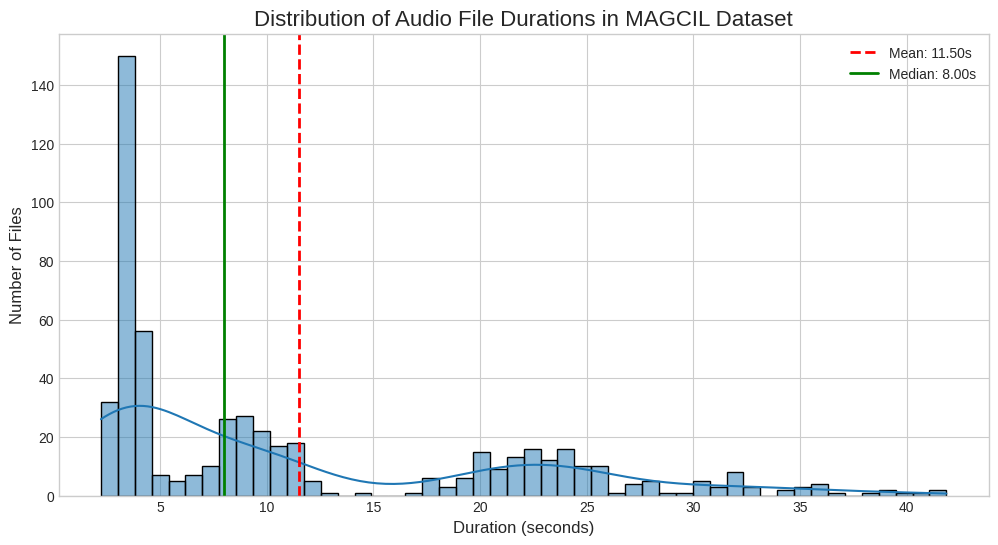

In [ ]:
# a quick sanity-check for the duration of file-level annotations
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# --- Configuration ---
# Use the path to your final, reorganized MAGCIL dataset
MAGCIL_UNIFIED_DIR = '/data/hjpark/magcil'

# --- Step 1: Collect Durations for all Audio Files ---

# We'll store durations in a dictionary to potentially analyze per-class stats later
durations_by_class = {}
all_durations = []

try:
    class_folders = [d for d in os.listdir(MAGCIL_UNIFIED_DIR) if os.path.isdir(os.path.join(MAGCIL_UNIFIED_DIR, d))]
    
    print(f"Analyzing audio file durations in '{MAGCIL_UNIFIED_DIR}'...")

    for class_folder in tqdm(class_folders, desc="Scanning Classes"):
        class_path = os.path.join(MAGCIL_UNIFIED_DIR, class_folder)
        durations_by_class[class_folder] = []
        
        for filename in os.listdir(class_path):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_path, filename)
                try:
                    # librosa.get_duration is very fast as it only reads the file header
                    duration = librosa.get_duration(path=file_path)
                    durations_by_class[class_folder].append(duration)
                    all_durations.append(duration)
                except Exception as e:
                    print(f"Warning: Could not process file {file_path}. Error: {e}")

except FileNotFoundError:
    print(f"‼️ ERROR: Directory not found at '{MAGCIL_UNIFIED_DIR}'. Please check the path.")

# --- Step 2: Calculate and Print Statistics ---

if all_durations:
    # Convert to a NumPy array for efficient calculations
    all_durations = np.array(all_durations)
    
    print("\n--- Overall Duration Statistics for MAGCIL Dataset ---")
    print(f"Total Samples Analyzed: {len(all_durations)}")
    print(f"Mean Duration:      {np.mean(all_durations):.3f} seconds")
    print(f"Median Duration:    {np.median(all_durations):.3f} seconds")
    print(f"Min Duration:       {np.min(all_durations):.3f} seconds")
    print(f"Max Duration:       {np.max(all_durations):.3f} seconds")
    print("-" * 20)
    print(f"25th Percentile:    {np.percentile(all_durations, 25):.3f} seconds")
    print(f"75th Percentile:    {np.percentile(all_durations, 75):.3f} seconds")
    print(f"95th Percentile:    {np.percentile(all_durations, 95):.3f} seconds")
    
    # --- Step 3: Plot the Distribution ---
    
    print("\nGenerating duration histogram...")
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(12, 6))
    
    sns.histplot(all_durations, bins=50, kde=True, ax=ax)
    
    # Add vertical lines for mean and median
    ax.axvline(np.mean(all_durations), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(all_durations):.2f}s')
    ax.axvline(np.median(all_durations), color='green', linestyle='-', linewidth=2, label=f'Median: {np.median(all_durations):.2f}s')
    
    ax.set_title('Distribution of Audio File Durations in MAGCIL Dataset', fontsize=16)
    ax.set_xlabel('Duration (seconds)', fontsize=12)
    ax.set_ylabel('Number of Files', fontsize=12)
    ax.legend()
    
    plt.show()

else:
    print("\nNo audio files were found to analyze.")

Analyzing note event durations from 261 XML files in '/data/hjpark/_IDMT-SMT-GUITAR_V2/dataset2/annotation'...


Parsing XML Files: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 261/261 [00:00<00:00, 1669.95it/s]


--- Note Event Duration Statistics for IDMT Dataset ---
Total Note Events Analyzed: 4881
Mean Duration:      0.655 seconds
Median Duration:    0.410 seconds
Min Duration:       0.035 seconds
Max Duration:       6.531 seconds
--------------------
25th Percentile:    0.245 seconds
75th Percentile:    0.721 seconds
95th Percentile:    2.171 seconds

Generating duration histogram...


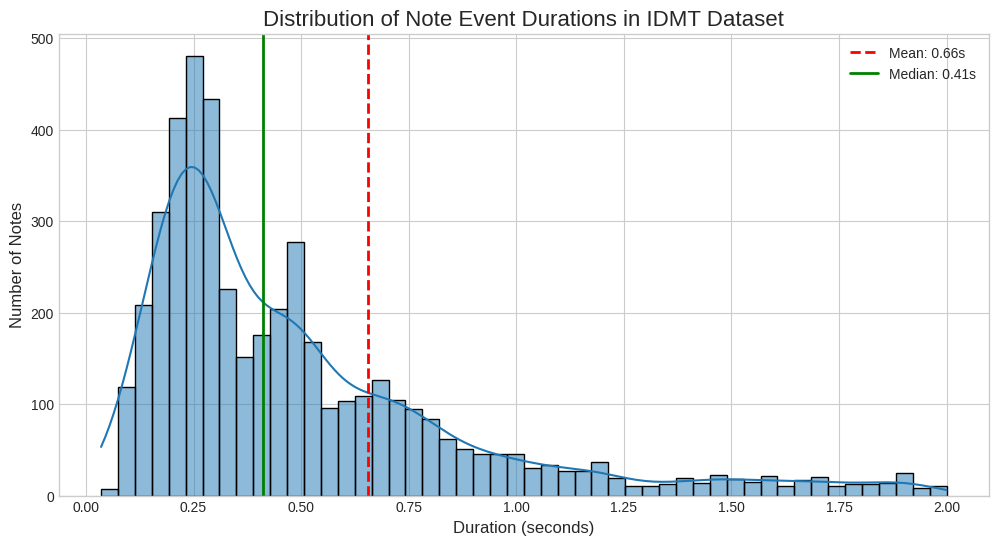

In [8]:
import os
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# --- Configuration ---
# Use the path to your IDMT XML annotations
IDMT_XML_DIR = '/data/hjpark/_IDMT-SMT-GUITAR_V2/dataset2/annotation' # <--- VERIFY THIS PATH

# --- Step 1: Parse all XML files and collect event durations ---

all_durations = []

try:
    xml_files = [f for f in os.listdir(IDMT_XML_DIR) if f.endswith('.xml')]
    
    print(f"Analyzing note event durations from {len(xml_files)} XML files in '{IDMT_XML_DIR}'...")

    for xml_file in tqdm(xml_files, desc="Parsing XML Files"):
        xml_path = os.path.join(IDMT_XML_DIR, xml_file)
        try:
            tree = ET.parse(xml_path)
            root = tree.getroot()
            for event in root.findall('.//event'):
                onset_tag = event.find('onsetSec')
                offset_tag = event.find('offsetSec')
                
                # Ensure both tags exist to calculate a valid duration
                if onset_tag is not None and offset_tag is not None:
                    onset_sec = float(onset_tag.text)
                    offset_sec = float(offset_tag.text)
                    duration = offset_sec - onset_sec
                    
                    # Add a check for valid durations (e.g., non-negative)
                    if duration > 0:
                        all_durations.append(duration)

        except ET.ParseError as e:
            print(f"Warning: Could not parse file {xml_file}. Error: {e}")

except FileNotFoundError:
    print(f"‼️ ERROR: Directory not found at '{IDMT_XML_DIR}'. Please check the path.")

# --- Step 2: Calculate and Print Statistics ---

if all_durations:
    all_durations = np.array(all_durations)
    
    print("\n--- Note Event Duration Statistics for IDMT Dataset ---")
    print(f"Total Note Events Analyzed: {len(all_durations)}")
    print(f"Mean Duration:      {np.mean(all_durations):.3f} seconds")
    print(f"Median Duration:    {np.median(all_durations):.3f} seconds")
    print(f"Min Duration:       {np.min(all_durations):.3f} seconds")
    print(f"Max Duration:       {np.max(all_durations):.3f} seconds")
    print("-" * 20)
    print(f"25th Percentile:    {np.percentile(all_durations, 25):.3f} seconds")
    print(f"75th Percentile:    {np.percentile(all_durations, 75):.3f} seconds")
    print(f"95th Percentile:    {np.percentile(all_durations, 95):.3f} seconds")
    
    # --- Step 3: Plot the Distribution ---
    
    print("\nGenerating duration histogram...")
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # We might have a long tail, so let's focus the plot on the bulk of the data
    # For example, plot only durations less than 2 seconds to see the details
    plot_durations = all_durations[all_durations < 2]
    sns.histplot(plot_durations, bins=50, kde=True, ax=ax)
    
    ax.axvline(np.mean(all_durations), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(all_durations):.2f}s')
    ax.axvline(np.median(all_durations), color='green', linestyle='-', linewidth=2, label=f'Median: {np.median(all_durations):.2f}s')
    
    ax.set_title('Distribution of Note Event Durations in IDMT Dataset', fontsize=16)
    ax.set_xlabel('Duration (seconds)', fontsize=12)
    ax.set_ylabel('Number of Notes', fontsize=12)
    ax.legend()
    
    plt.show()

else:
    print("\nNo note events were found to analyze.")

#### 3.2 AGPT dataset

In [14]:
import os
import pandas as pd
import librosa
import soundfile as sf
from tqdm import tqdm
import shutil

# --- Configuration ---

# 1. Path to the root of the aGPTset dataset
AGPT_ROOT_DIR = '/data/hjpark/_AGPT/aGPTset_z/aGPTset'

# 2. Path for the new, reorganized file-level dataset
OUTPUT_DATA_DIR = '/data/hjpark/AGPT' # Using a new name for clarity

# 3. Use the 400ms fixed window duration
FIXED_WINDOW_DURATION_SEC = 0.4

# --- Main Processing Script ---

print(f"Processing aGPTset from '{AGPT_ROOT_DIR}' for the 11-class structure.")
print(f"Saving unified file-level data to '{OUTPUT_DATA_DIR}'")

# --- Step 1: Create the mapping from aGPT ID -> Unified Class Name ---

# Load the CSV that maps technique IDs to their names
techniques_csv_path = os.path.join(AGPT_ROOT_DIR, 'metadata', 'expressive_techniques.csv')
techniques_df = pd.read_csv(techniques_csv_path)
id_to_name = techniques_df.set_index('expressive_technique_id')['name'].to_dict()

# Define the NEW mapping from the aGPT technique names to YOUR 11 unified class names
agpt_name_to_unified = {
    'Bending': 'bend',
    'Hammer-on': 'legato', # aGPT 'Hammer-on' maps to the unified 'legato' class
    'Staccato': 'staccato',
    'Vibrato': 'vibrato',
    'Palm Mute': 'palm_mute',
    'Natural Harmonics': 'harmonics',
    'Pick Near Bridge': 'picking',      # aGPT picking types map to the general 'picking' class
    'Pick Over the Soundhole': 'picking',
    # All percussive techniques like 'Kick', 'Snare-A/B', 'Tom' are not in this map,
    # so they will automatically be classified as 'other'.
}

# Combine the two maps to get a final ID -> Unified Class mapping
AGPT_ID_TO_UNIFIED = {}
for tech_id, tech_name in id_to_name.items():
    AGPT_ID_TO_UNIFIED[tech_id] = agpt_name_to_unified.get(tech_name, 'other')

print("\nFinal mapping from aGPT ID to Unified Class:")
print(AGPT_ID_TO_UNIFIED)

# --- Step 2: Create all necessary output directories ---

# Start with a clean directory
if os.path.exists(OUTPUT_DATA_DIR):
    shutil.rmtree(OUTPUT_DATA_DIR)
os.makedirs(OUTPUT_DATA_DIR)

# Explicitly define all 11 target classes to ensure identical folder structure
all_unified_classes = [
    'picking', 'sweep_picking', 'alternate_picking', 'legato', 'slide',
    'bend', 'vibrato', 'palm_mute', 'staccato', 'harmonics', 'other'
]

for unified_class in all_unified_classes:
    os.makedirs(os.path.join(OUTPUT_DATA_DIR, unified_class), exist_ok=True)

# --- Step 3: Process the main note labels CSV ---
note_labels_csv_path = os.path.join(AGPT_ROOT_DIR, 'metadata', 'note_labels.csv')
notes_df = pd.read_csv(note_labels_csv_path)
audio_cache = {}

print(f"\nProcessing {len(notes_df)} labeled notes from 'note_labels.csv'...")

for index, row in tqdm(notes_df.iterrows(), total=len(notes_df), desc="Processing Notes"):
    audio_filename = row['audio_file_path']
    full_audio_path = os.path.join(AGPT_ROOT_DIR, 'data', 'audio', audio_filename)
    
    technique_id = row['expressive_technique_id']
    unified_class = AGPT_ID_TO_UNIFIED.get(technique_id, 'other')

    if audio_filename not in audio_cache:
        if not os.path.exists(full_audio_path):
            continue
        try:
            y, sr = librosa.load(full_audio_path, sr=None)
            audio_cache[audio_filename] = (y, sr)
        except Exception as e:
            print(f"Error loading {audio_filename}: {e}")
            audio_cache[audio_filename] = (None, None)
            continue
    
    y, sr = audio_cache[audio_filename]
    if y is None:
        continue
    
    onset_sec = row['onset_label_seconds']
    start_sample = int(onset_sec * sr)
    end_sample = start_sample + int(FIXED_WINDOW_DURATION_SEC * sr)
    end_sample = min(end_sample, len(y))
    
    segment = y[start_sample:end_sample]
    
    if len(segment) < 2048:
        continue
        
    base_name = os.path.splitext(audio_filename)[0]
    new_fname = f"{base_name}_note{index}_{unified_class}.wav"
    
    out_dir = os.path.join(OUTPUT_DATA_DIR, unified_class)
    out_path = os.path.join(out_dir, new_fname)
    
    try:
        sf.write(out_path, segment, sr)
    except Exception as e:
        print(f"Error writing segment for {new_fname}: {e}")

print(f"\n✅ All labeled aGPTset notes have been cropped and saved to '{OUTPUT_DATA_DIR}'.")

Processing aGPTset from '/data/hjpark/_AGPT/aGPTset_z/aGPTset' for the 11-class structure.
Saving unified file-level data to '/data/hjpark/AGPT'

Final mapping from aGPT ID to Unified Class:
{0: 'other', 1: 'other', 2: 'other', 3: 'other', 4: 'harmonics', 5: 'palm_mute', 6: 'picking', 7: 'picking', 8: 'bend', 9: 'legato', 10: 'staccato', 11: 'vibrato'}

Processing 32592 labeled notes from 'note_labels.csv'...


Processing Notes: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32592/32592 [02:21<00:00, 231.13it/s]


✅ All labeled aGPTset notes have been cropped and saved to '/data/hjpark/AGPT'.


### 4. Visualize class distribution

Analyzing class distribution in: '/data/hjpark/IDMT'



Scanning folders: 100%|██████████| 11/11 [00:00<00:00, 2956.76it/s]

--- Class Distribution Summary ---
                Class  Count
0             picking   1446
1               other   1311
2           palm_mute   1131
3           harmonics    126
4             vibrato    117
5               slide     93
6                bend     54
7              legato      0
8       sweep_picking      0
9            staccato      0
10  alternate_picking      0
------------------------------
Total Samples: 4278



/tmp/ipykernel_748072/1632178727.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='Count', data=df_counts, ax=ax, palette='viridis')


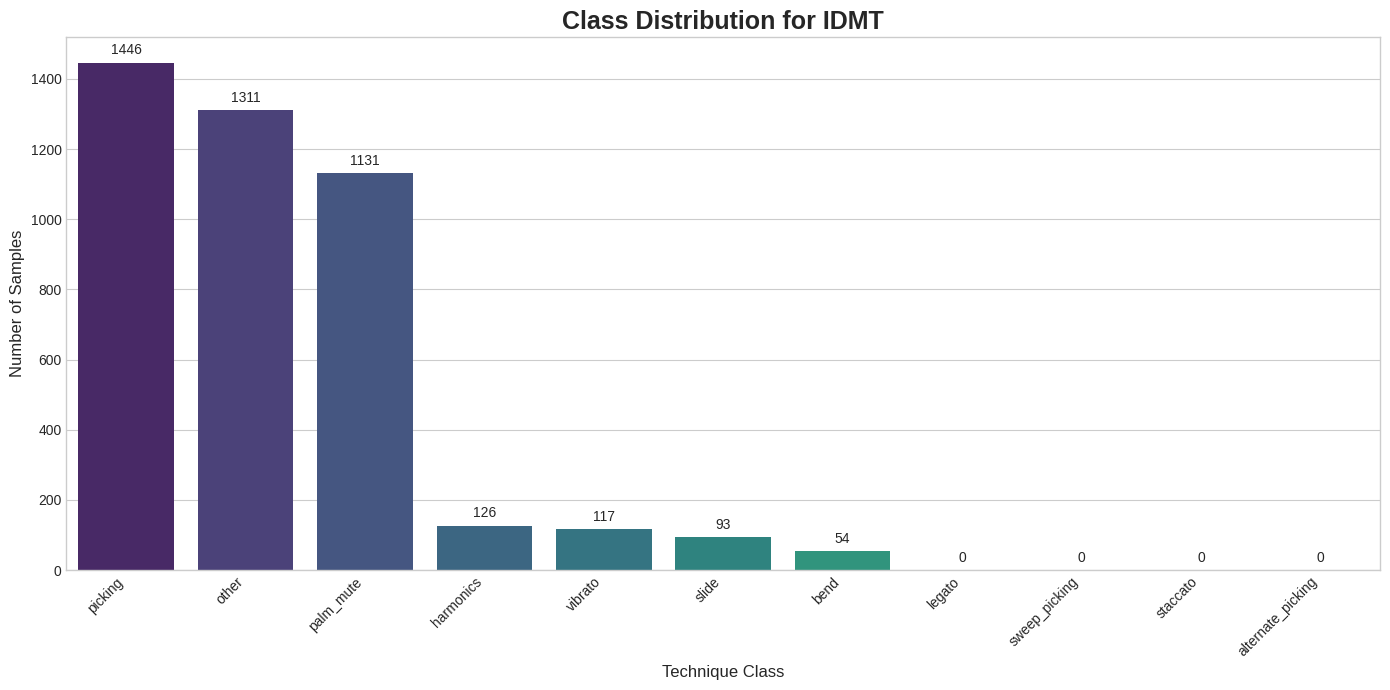

In [28]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# --- Configuration ---
# Point this to the dataset directory you want to analyze.
# For example:
DATASET_DIR = '/data/hjpark/IDMT' # <--- You can visualize any dataset by changing the directory name

# --- Step 1: Count Samples in Each Class Folder ---

class_counts = {}

try:
    # Get all items in the directory that are folders
    class_folders = [d for d in os.listdir(DATASET_DIR) if os.path.isdir(os.path.join(DATASET_DIR, d))]
    
    print(f"Analyzing class distribution in: '{DATASET_DIR}'\n")

    for class_folder in tqdm(class_folders, desc="Scanning folders"):
        class_path = os.path.join(DATASET_DIR, class_folder)
        # Count only the .wav files in each folder
        num_files = len([f for f in os.listdir(class_path) if f.endswith('.wav')])
        class_counts[class_folder] = num_files

except FileNotFoundError:
    print(f"‼️ ERROR: Directory not found at '{DATASET_DIR}'. Please check the path.")
    class_counts = {}

# --- Step 2: Print a Summary Table ---

if class_counts:
    # Convert to a Pandas DataFrame for easy sorting and printing
    df_counts = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Count'])
    df_counts = df_counts.sort_values('Count', ascending=False).reset_index(drop=True)
    
    print("--- Class Distribution Summary ---")
    print(df_counts)
    print("-" * 30)
    print(f"Total Samples: {df_counts['Count'].sum()}")
    
    # --- Step 3: Generate the Bar Chart Visualization ---
    
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(14, 7))
    
    # Create the bar plot using the sorted DataFrame
    sns.barplot(x='Class', y='Count', data=df_counts, ax=ax, palette='viridis')
    
    # Add the exact count on top of each bar for clarity
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points')

    # Formatting the plot
    dataset_name = os.path.basename(DATASET_DIR)
    ax.set_title(f'Class Distribution for {dataset_name}', fontsize=18, weight='bold')
    ax.set_xlabel('Technique Class', fontsize=12)
    ax.set_ylabel('Number of Samples', fontsize=12)
    plt.xticks(rotation=45, ha='right') # Rotate labels to prevent overlap
    plt.tight_layout() # Adjust layout to make sure everything fits
    
    plt.show()

else:
    print("\nNo classes found or directory is empty. Cannot generate visualization.")


### 5. train-test split for IDMT

In [21]:
import os
import shutil
import glob
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# --- Configuration ---

# 1. Path to your source dataset
DATA_ROOT = '/data/hjpark/IDMT'

# 2. Path for the new directory where the splits will be saved
OUTPUT_DIR = '/data/hjpark/IDMT_split'

# --- Step 1: Discover Classes and Perform Logical Split ---

print("--- Step 1: Performing logical 80/20 split for each class ---")

# FIX: Get the class names DIRECTLY from the DATA_ROOT directory.
# This ensures we are working with the correct folder names for the IDMT dataset.
try:
    idmt_classes = [d for d in os.listdir(DATA_ROOT) if os.path.isdir(os.path.join(DATA_ROOT, d))]
    print(f"Found {len(idmt_classes)} classes in '{DATA_ROOT}': {idmt_classes}")
except FileNotFoundError:
    print(f"‼️ ERROR: Source directory not found at '{DATA_ROOT}'. Please check the path.")
    idmt_classes = []

# Now, use the correct 'idmt_classes' list to find the files
segments_by_class = {lab: sorted(glob.glob(f"{DATA_ROOT}/{lab}/*.wav")) for lab in idmt_classes}

train_files = []
test_files = []
test_fraction = 0.8  # 80% test set

for lab, files in segments_by_class.items():
    if len(files) > 1:
        train, test = train_test_split(files, test_size=test_fraction, random_state=42)
        train_files.extend(train)
        test_files.extend(test)
    elif len(files) == 1:
        train_files.extend(files)
        print(f"Warning: Class '{lab}' has only one sample. Adding it to the training set.")
    else:
        print(f"Warning: Class '{lab}' has no samples. Skipping.")

# Calculate the total number of files found and processed
total_files_found = len(train_files) + len(test_files)

print(f"\nLogical split complete:")
print(f" - Total files processed: {total_files_found}") # This should now be 4000+
print(f" - {len(train_files)} files designated for training (20%).")
print(f" - {len(test_files)} files designated for testing (80%).")


# --- Step 2: Physically Copy Files into New Train/Test Folders ---

# (This part of the code was already correct and needs no changes)
print(f"\n--- Step 2: Copying files into new directory structure at '{OUTPUT_DIR}' ---")

def copy_files_to_split_dir(file_list, split_name, base_output_dir):
    split_dir = os.path.join(base_output_dir, split_name)
    for file_path in tqdm(file_list, desc=f"Copying {split_name} files"):
        class_name = os.path.basename(os.path.dirname(file_path))
        class_dir = os.path.join(split_dir, class_name)
        os.makedirs(class_dir, exist_ok=True)
        shutil.copy2(file_path, class_dir)

if total_files_found > 0:
    if os.path.exists(OUTPUT_DIR):
        shutil.rmtree(OUTPUT_DIR)
    
    copy_files_to_split_dir(train_files, 'train', OUTPUT_DIR)
    copy_files_to_split_dir(test_files, 'test', OUTPUT_DIR)
    
    print(f"\n✅ Physical split complete! Your data is now organized in '{OUTPUT_DIR}'.")
else:
    print("\nNo files were processed. Cannot create split directories.")


--- Step 1: Performing logical 80/20 split for each class ---
Found 11 classes in '/data/hjpark/IDMT': ['legato', 'bend', 'palm_mute', 'vibrato', 'slide', 'other', 'picking', 'sweep_picking', 'staccato', 'harmonics', 'alternate_picking']

Logical split complete:
 - Total files processed: 4278
 - 853 files designated for training (20%).
 - 3425 files designated for testing (80%).

--- Step 2: Copying files into new directory structure at '/data/hjpark/IDMT_split' ---


Copying train files:   0%|                                                                                                                                   | 0/853 [00:00<?, ?it/s]

Copying test files: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3425/3425 [00:00<00:00, 4981.62it/s]


✅ Physical split complete! Your data is now organized in '/data/hjpark/IDMT_split'.


### 6. Combine the datasets (train: AGPT, Magcil, IDMT-train, test: IDMT-test)

In [2]:
import os
import shutil
from tqdm import tqdm

# --- Configuration: Define all source and destination paths ---

# 1. Source Directories
MAGCIL_DIR = '/data/hjpark/magcil'
AGPT_DIR = '/data/hjpark/AGPT'
IDMT_SPLIT_DIR = '/data/hjpark/IDMT_split_50-50' # This is the folder containing 'train' and 'test' subfolders

# 2. Final Output Directory
COMBINED_OUTPUT_DIR = '/data/hjpark/combined_dataset_final'

# --- Main Merging Script ---

# A helper function to make the copying process clean and reusable
def merge_dataset(source_dir, dest_dir, dataset_name=""):
    """
    Copies all class folders and .wav files from a source to a destination.
    """
    if not os.path.exists(source_dir):
        print(f"⚠️ Warning: Source directory not found, skipping: {source_dir}")
        return 0
    
    class_folders = [d for d in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, d))]
    
    file_copy_count = 0
    for class_folder in tqdm(class_folders, desc=f"Merging {dataset_name} - {os.path.basename(source_dir)}"):
        # --- MODIFICATION TO DROP STACCATO CLASS ---
        if class_folder == 'staccato':
            print(f"Skipping class: {class_folder}")
            continue # This will skip the 'staccato' folder and not copy it.

        source_class_path = os.path.join(source_dir, class_folder)
        dest_class_path = os.path.join(dest_dir, class_folder)
        
        # Create the destination class folder if it doesn't exist
        os.makedirs(dest_class_path, exist_ok=True)
        
        # Copy all .wav files
        for filename in os.listdir(source_class_path):
            if filename.endswith('.wav'):
                shutil.copy2(os.path.join(source_class_path, filename), dest_class_path)
                file_copy_count += 1
    return file_copy_count


print(f"--- Starting dataset merge into '{COMBINED_OUTPUT_DIR}' ---")

# Start with a clean slate for the output directory
if os.path.exists(COMBINED_OUTPUT_DIR):
    print(f"Removing existing directory: {COMBINED_OUTPUT_DIR}")
    shutil.rmtree(COMBINED_OUTPUT_DIR)

# Create the main train and test directories
train_dir = os.path.join(COMBINED_OUTPUT_DIR, 'train')
test_dir = os.path.join(COMBINED_OUTPUT_DIR, 'test')
os.makedirs(train_dir)
os.makedirs(test_dir)

# --- Step 1: Combine all training data ---
print("\n--- Merging TRAINING sets ---")
idmt_train_dir = os.path.join(IDMT_SPLIT_DIR, 'train')

merge_dataset(MAGCIL_DIR, train_dir, "MAGCIL")
merge_dataset(AGPT_DIR, train_dir, "aGPTset")
merge_dataset(idmt_train_dir, train_dir, "IDMT-Train")

# --- Step 2: Add the test data ---
print("\n--- Merging TESTING set ---")
idmt_test_dir = os.path.join(IDMT_SPLIT_DIR, 'test')
merge_dataset(idmt_test_dir, test_dir, "IDMT-Test")

# --- Step 3: Final Verification and Summary ---
def count_files(directory):
    total = 0
    for root, dirs, files in os.walk(directory):
        total += len([f for f in files if f.endswith('.wav')])
    return total

print("\n--- Merge Complete! ---")
total_train_files = count_files(train_dir)
total_test_files = count_files(test_dir)

print(f"Total training files: {total_train_files}")
print(f"Total testing files:  {total_test_files}")
print(f"✅ Your final combined dataset is ready at: '{COMBINED_OUTPUT_DIR}'")

--- Starting dataset merge into '/data/hjpark/combined_dataset_final' ---

--- Merging TRAINING sets ---


Merging MAGCIL - magcil:  70%|███████   | 7/10 [00:16<00:04,  1.60s/it]

Skipping class: staccato


Merging aGPTset - AGPT:  64%|██████▎   | 7/11 [01:17<00:53, 13.42s/it]

Skipping class: staccato


Merging IDMT-Train - train: 100%|██████████| 7/7 [00:05<00:00,  1.33it/s]



--- Merging TESTING set ---


Merging IDMT-Test - test: 100%|██████████| 7/7 [00:05<00:00,  1.29it/s]



--- Merge Complete! ---
Total training files: 35278
Total testing files:  2141
✅ Your final combined dataset is ready at: '/data/hjpark/combined_dataset_final'


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# --- Configuration ---
# Point this to the root of your final combined dataset
COMBINED_DATASET_ROOT = '/data/hjpark/combined_dataset_final'
TRAIN_DIR = os.path.join(COMBINED_DATASET_ROOT, 'train')
TEST_DIR = os.path.join(COMBINED_DATASET_ROOT, 'test')

def analyze_and_visualize(dataset_dir, plot_title, output_filename):
    """
    Scans a dataset directory, counts samples per class, prints a summary,
    and saves a bar chart visualization.
    """
    print(f"\n--- Analyzing Class Distribution in: '{dataset_dir}' ---")
    
    class_counts = {}
    try:
        class_folders = sorted([d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))])
        if not class_folders:
            print("‼️ ERROR: No class subdirectories found.")
            return

        for class_folder in class_folders:
            class_path = os.path.join(dataset_dir, class_folder)
            num_files = len([f for f in os.listdir(class_path) if f.endswith('.wav')])
            class_counts[class_folder] = num_files

    except FileNotFoundError:
        print(f"‼️ ERROR: Directory not found at '{dataset_dir}'. Please run the merge script first.")
        return

    if not class_counts:
        print("No .wav files found to analyze.")
        return

    df_counts = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Count'])
    df_counts = df_counts.sort_values('Count', ascending=False).reset_index(drop=True)
    
    print(f"\n--- {plot_title} ---")
    print(df_counts.to_string())
    print("-" * 35)
    print(f"Total Samples: {df_counts['Count'].sum()}")
    print("-" * 35)
    
    # --- Generate the Bar Chart ---
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(14, 8))
    
    sns.barplot(x='Class', y='Count', data=df_counts, ax=ax, palette='viridis')
    
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    ax.set_title(plot_title, fontsize=18, weight='bold')
    ax.set_xlabel('Unified Technique Class', fontsize=12)
    ax.set_ylabel('Number of Samples', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    plt.savefig(output_filename)
    print(f"✅ Chart saved to '{output_filename}'")
    plt.close() # Close the figure to free up memory

if __name__ == '__main__':
    # Analyze and plot the training set
    analyze_and_visualize(TRAIN_DIR, 'Final Training Set Distribution', 'combined_train_distribution.png')
    
    # Analyze and plot the testing set
    analyze_and_visualize(TEST_DIR, 'Final Testing Set Distribution', 'combined_test_distribution.png')



--- Analyzing Class Distribution in: '/data/hjpark/combined_dataset_final/train' ---

--- Final Training Set Distribution ---
               Class  Count
0            picking  15607
1              other   8764
2          palm_mute   8153
3          harmonics   2155
4             legato    189
5            vibrato    112
6              slide    100
7  alternate_picking     81
8               bend     81
9      sweep_picking     36
-----------------------------------
Total Samples: 35278
-----------------------------------


/tmp/ipykernel_1028968/3320086979.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='Count', data=df_counts, ax=ax, palette='viridis')


✅ Chart saved to 'combined_train_distribution.png'

--- Analyzing Class Distribution in: '/data/hjpark/combined_dataset_final/test' ---

--- Final Testing Set Distribution ---
       Class  Count
0    picking    723
1      other    656
2  palm_mute    566
3  harmonics     63
4    vibrato     59
5      slide     47
6       bend     27
-----------------------------------
Total Samples: 2141
-----------------------------------


/tmp/ipykernel_1028968/3320086979.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='Count', data=df_counts, ax=ax, palette='viridis')


✅ Chart saved to 'combined_test_distribution.png'


## C) Train on the Unified dataset

### Let's fine-tune the model by training on dataset 1 of IDMT

In [2]:
import os
import glob
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report
from tqdm import tqdm
import librosa

# ==============================================================================
# 1. Feature Extraction and Model Definition
# ==============================================================================

def extract_features_from_audio(file_path):
    """
    Extracts a 180-dimensional feature vector from a single audio file.
    (This must be identical to the function used to create the dataset).
    """
    try:
        y, sr = librosa.load(file_path, mono=True)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
        mfccs_mean, mfccs_std = np.mean(mfccs, axis=1), np.std(mfccs, axis=1)
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40)
        mel_spec_mean, mel_spec_std = np.mean(mel_spec, axis=1), np.std(mel_spec, axis=1)
        chroma = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=10)
        chroma_mean, chroma_std = np.mean(chroma, axis=1), np.std(chroma, axis=1)
        return np.concatenate([mfccs_mean, mfccs_std, mel_spec_mean, mel_spec_std, chroma_mean, chroma_std])
    except Exception as e:
        # print(f"Error processing {file_path}: {e}") # Uncomment for debugging
        return None

def create_model_A(input_shape=(180,), num_classes=10, dropout_rate=0.4, l2_lambda=1e-4):
    """
    Creates and compiles the Keras model with Dropout and L2 regularization.
    (CORRECTED: The final Dense layer is now correctly placed outside the loop).
    """
    model = Sequential(name="Final_Combined_Model")
    model.add(InputLayer(input_shape=input_shape))
    
    # Four hidden layers
    for _ in range(4):
        model.add(Dense(800, activation='relu', kernel_regularizer=l2(l2_lambda)))
        model.add(BatchNormalization())
        model.add(Dropout(dropout_rate))
        
    # Final output layer (placed correctly AFTER the loop)
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# ==============================================================================
# 2. Data Loading from the Combined Train/Test Directories
# ==============================================================================

def load_data_from_final_dir(directory, label_map):
    """
    Loads pre-processed audio files, extracts features, and returns X, y arrays.
    """
    X, y = [], []
    for class_name, class_idx in label_map.items():
        class_path = os.path.join(directory, class_name)
        if not os.path.exists(class_path):
            print(f"Warning: Class folder not found in {os.path.basename(directory)} set: {class_name}")
            continue
        
        wav_files = glob.glob(os.path.join(class_path, '*.wav'))
        for file_path in tqdm(wav_files, desc=f"Loading {class_name} ({os.path.basename(directory)})"):
            features = extract_features_from_audio(file_path)
            if features is not None:
                X.append(features)
                y.append(class_idx)
    return np.array(X), np.array(y)



2025-09-17 19:31:59.851586: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# --- Configuration ---
TRAIN_DIR = '/data/hjpark/combined_dataset_augmented/train'
TEST_DIR = '/data/hjpark/combined_dataset_final/test'
MODEL_OUTPUT_DIR = 'models_final'
os.makedirs(MODEL_OUTPUT_DIR, exist_ok=True)

# --- Load Data ---
# Discover class labels from the training directory subfolders
try:
    all_labels = sorted([d for d in os.listdir(TRAIN_DIR) if os.path.isdir(os.path.join(TRAIN_DIR, d))])
    label_map = {name: i for i, name in enumerate(all_labels)}
    num_classes = len(all_labels)
    print(f"Discovered {num_classes} classes: {all_labels}")
except FileNotFoundError:
    print(f"‼️ ERROR: Training directory not found at '{TRAIN_DIR}'. Cannot proceed.")
    all_labels = []


Discovered 10 classes: ['alternate_picking', 'bend', 'harmonics', 'legato', 'other', 'palm_mute', 'picking', 'slide', 'sweep_picking', 'vibrato']


In [6]:
if all_labels:
    X_train, y_train = load_data_from_final_dir(TRAIN_DIR, label_map)
    X_test, y_test = load_data_from_final_dir(TEST_DIR, label_map)
    
    import numpy as np

    print("Saving processed data to disk...")
    # np.save('X_train_final.npy', X_train)
    # np.save('y_train_final.npy', y_train)
    # np.save('X_test_final.npy', X_test)
    # np.save('y_test_final.npy', y_test)
    print("Data saved successfully.")

Loading other (train):   0%|          | 45/10000 [00:00<01:08, 145.41it/s]/home/hjpark/.venv/lib/python3.10/site-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
Loading vibrato (train): 100%|██████████| 2000/2000 [00:51<00:00, 38.94it/s]


Loading harmonics (test): 100%|██████████| 63/63 [00:00<00:00, 147.20it/s]


Loading slide (test): 100%|██████████| 47/47 [00:00<00:00, 158.31it/s]


Loading vibrato (test): 100%|██████████| 59/59 [00:00<00:00, 151.40it/s]


Saving processed data to disk...
Data saved successfully.


#### Side quest: Data augmentation

In [ ]:
import numpy as np
import librosa
import soundfile as sf
import os
from tqdm import tqdm
# You may need to install this library: pip install audiomentations
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift

# --- Configuration ---
# The root of your final, combined training data
SOURCE_TRAIN_DIR = '/data/hjpark/combined_dataset_final/train'

# A new directory to save the augmented data to
AUGMENTED_TRAIN_DIR = '/data/hjpark/combined_dataset_augmented/train'

# Define which classes to augment and by how much
# The number is the desired number of SAMPLES in that class folder
AUGMENTATION_TARGETS = {
    "alternate_picking": 2000,
    "bend": 2000,
    "sweep_picking": 2000,
    "slide": 2000,
    "vibrato": 2000,
    "harmonics": 2000,
    "legato": 2000,
    # We can also slightly augment 'other' and 'palm_mute' if needed
    "other": 10000, # Let's not make it too big
    "palm_mute": 8000,
    # 'picking' is already large, so we don't need to augment it
    "picking": 0 
}

# Define the augmentation effects
augmenter = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
    TimeStretch(min_rate=0.8, max_rate=1.25, p=0.5),
    PitchShift(min_semitones=-2, max_semitones=2, p=0.5),
])

def augment_class_data():
    """
    Applies audio augmentation to classes that are under-represented.
    """
    if not os.path.exists(SOURCE_TRAIN_DIR):
        print(f"ERROR: Source directory not found at {SOURCE_TRAIN_DIR}")
        return

    # First, copy all original files to the new directory
    print(f"Copying original training data to {AUGMENTED_TRAIN_DIR}...")
    shutil.copytree(SOURCE_TRAIN_DIR, AUGMENTED_TRAIN_DIR)
    
    print("\n--- Starting Augmentation ---")
    for class_name, target_count in AUGMENTATION_TARGETS.items():
        class_dir = os.path.join(AUGMENTED_TRAIN_DIR, class_name)
        if not os.path.exists(class_dir):
            print(f"Warning: Class folder '{class_name}' not found. Skipping.")
            continue
        
        original_files = [f for f in os.listdir(class_dir) if f.endswith('.wav')]
        num_to_create = target_count - len(original_files)

        if num_to_create <= 0:
            print(f"'{class_name}' already has enough samples. Skipping.")
            continue
        
        print(f"Augmenting '{class_name}': Creating {num_to_create} new samples...")
        
        for i in tqdm(range(num_to_create)):
            # Pick a random original file to augment
            random_file = np.random.choice(original_files)
            file_path = os.path.join(class_dir, random_file)
            
            y, sr = librosa.load(file_path, sr=None)
            
            # Apply a random augmentation from the 'augmenter' composition
            augmented_audio = augmenter(samples=y, sample_rate=sr)
            
            # Save the new file
            new_filename = f"aug_{i}_{random_file}"
            output_path = os.path.join(class_dir, new_filename)
            sf.write(output_path, augmented_audio, sr)

    print("\n✅ Augmentation complete!")

if __name__ == '__main__':
    augment_class_data()

--- Analyzing Class Distribution in: '/data/hjpark/combined_dataset_augmented/train' ---
Found 10 class folders. Counting samples...


Scanning folders: 100%|██████████| 10/10 [00:00<00:00, 236.26it/s]


--- Augmented Training Set Distribution ---
               Class  Count
0            picking  15607
1              other  10000
2          palm_mute   8153
3          harmonics   2155
4               bend   2000
5             legato   2000
6              slide   2000
7            vibrato   2000
8      sweep_picking   2000
9  alternate_picking   2000
----------------------------------------
Total Augmented Training Samples: 47915
----------------------------------------

Generating bar chart...



/tmp/ipykernel_1759847/349911839.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='Count', data=df_counts, ax=ax, palette='viridis')



✅ Chart saved to 'augmented_train_distribution.png'


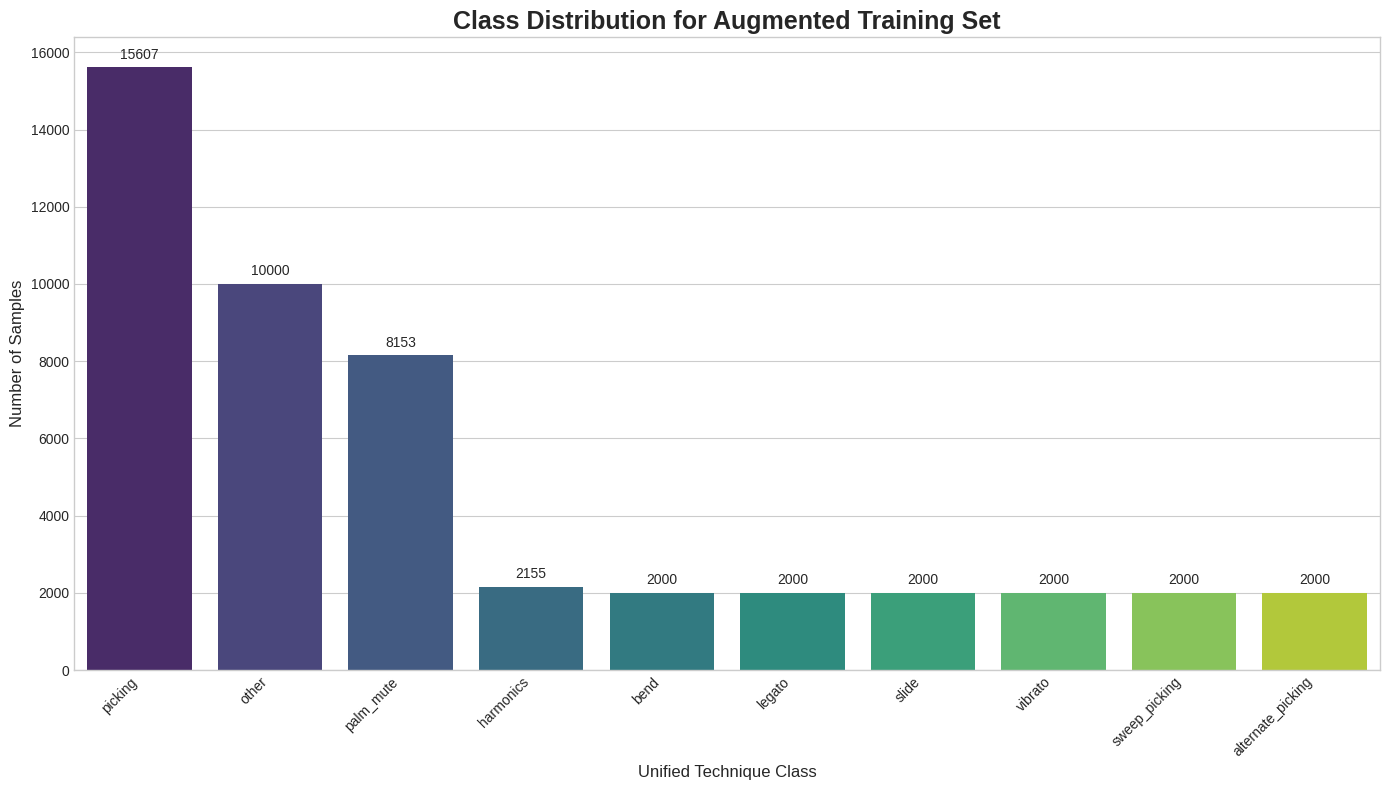

In [9]:
# Quickly check the class distribution after data augmentation step
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# --- Configuration ---
# Point this to the training set directory that contains the augmented data
AUGMENTED_DATASET_DIR = '/data/hjpark/combined_dataset_augmented/train'

def visualize_augmented_distribution():
    """
    Scans the augmented dataset directory, counts the samples per class,
    and generates a summary table and a bar chart visualization.
    """
    print(f"--- Analyzing Class Distribution in: '{AUGMENTED_DATASET_DIR}' ---")
    
    # --- Step 1: Count Samples in Each Class Folder ---
    class_counts = {}
    try:
        class_folders = [d for d in os.listdir(AUGMENTED_DATASET_DIR) if os.path.isdir(os.path.join(AUGMENTED_DATASET_DIR, d))]
        if not class_folders:
            print(f"‼️ ERROR: No class subdirectories found in '{AUGMENTED_DATASET_DIR}'.")
            return

        print(f"Found {len(class_folders)} class folders. Counting samples...")
        for class_folder in tqdm(class_folders, desc="Scanning folders"):
            class_path = os.path.join(AUGMENTED_DATASET_DIR, class_folder)
            num_files = len([f for f in os.listdir(class_path) if f.endswith('.wav')])
            class_counts[class_folder] = num_files

    except FileNotFoundError:
        print(f"‼️ ERROR: Directory not found at '{AUGMENTED_DATASET_DIR}'. Please run the augmentation script first.")
        return

    # --- Step 2: Print a Summary Table ---
    if not class_counts:
        print("No .wav files found to analyze.")
        return

    df_counts = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Count'])
    df_counts = df_counts.sort_values('Count', ascending=False).reset_index(drop=True)
    
    print("\n--- Augmented Training Set Distribution ---")
    print(df_counts.to_string())
    print("-" * 40)
    print(f"Total Augmented Training Samples: {df_counts['Count'].sum()}")
    print("-" * 40)
    
    # --- Step 3: Generate the Bar Chart Visualization ---
    print("\nGenerating bar chart...")
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(14, 8))
    
    sns.barplot(x='Class', y='Count', data=df_counts, ax=ax, palette='viridis')
    
    # Add the exact count on top of each bar for clarity
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points')

    ax.set_title('Class Distribution for Augmented Training Set', fontsize=18, weight='bold')
    ax.set_xlabel('Unified Technique Class', fontsize=12)
    ax.set_ylabel('Number of Samples', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    # Save the plot to a file
    output_filename = 'augmented_train_distribution.png'
    plt.savefig(output_filename)
    print(f"\n✅ Chart saved to '{output_filename}'")

if __name__ == '__main__':
    visualize_augmented_distribution()


### Continue training

In [10]:
%pwd

'/home/hjpark/expressive-technique/icassp2026'

In [23]:
# if all_labels:
#     import numpy as np

#     print("Loading pre-processed data from disk...")
#     X_train = np.load('X_train_final.npy')
#     y_train = np.load('y_train_final.npy')
#     X_test = np.load('X_test_final.npy')
#     y_test = np.load('y_test_final.npy')
#     print("Data loaded successfully.")

#     print("\n--- Data Loading Summary ---")
#     print(f"Training samples: {len(X_train)}")
#     print(f"Testing samples:  {len(X_test)}")

#     # ==============================================================================
#     # 3. Model Training and Evaluation
#     # ==============================================================================

#     # --- Prepare Labels (One-Hot Encoding) ---
#     y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
#     y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

#     # --- Instantiate the Model ---
#     model = create_model_A(num_classes=num_classes, dropout_rate=0.5, l2_lambda=1e-3)
#     model.summary()

#     # --- Callbacks ---
#     MODEL_SAVE_PATH = os.path.join(MODEL_OUTPUT_DIR, 'best_final_model.h5')
#     checkpoint_callback = ModelCheckpoint(filepath=MODEL_SAVE_PATH, monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
#     early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

#     # --- Train the Model ---
#     print("\n--- Starting Final Model Training ---")
#     history = model.fit(
#         X_train, y_train_cat,
#         batch_size=32,  # <--- REDUCED FROM 64 to 32
#         epochs=100,
#         validation_data=(X_test, y_test_cat),
#         callbacks=[checkpoint_callback, early_stopping_callback]
#     )

# ==============================================================================
# 2. Model Training with Enhancements
# ==============================================================================
if all_labels:
    import numpy as np
    import tensorflow as tf
    from sklearn.utils import class_weight
    from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

    print("Loading pre-processed AUGMENTED data from disk...")
    # --- CHANGE: Load the augmented training data ---
    X_train = np.load('X_train_final.npy')
    y_train = np.load('y_train_final.npy')
    
    # Test data remains the original
    X_test = np.load('X_test_final.npy')
    y_test = np.load('y_test_final.npy')
    print("Data loaded successfully.")

    print("\n--- Data Loading Summary ---")
    print(f"Augmented training samples: {len(X_train)}")
    print(f"Testing samples:  {len(X_test)}")

    # --- Prepare Labels (One-Hot Encoding) ---
    y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
    y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

    # --- NEW: Compute Class Weights ---
    # This will create weights that are inversely proportional to class frequencies
    class_weights = class_weight.compute_class_weight(
        'balanced',
        classes=np.unique(y_train),
        y=y_train
    )
    class_weight_dict = dict(enumerate(class_weights))
    print("\nComputed Class Weights to counter imbalance.")

    # --- Instantiate the Model ---
    # The dropout and L2 values are already strong, no change needed there.
    model = create_model_A(num_classes=num_classes, dropout_rate=0.5, l2_lambda=1e-3)

    # --- NEW: Compile model with a lower learning rate ---
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    model.summary()

    # --- Callbacks ---
    MODEL_SAVE_PATH = os.path.join(MODEL_OUTPUT_DIR, 'best_final_model_augmented.h5') # New model name
    checkpoint_callback = ModelCheckpoint(filepath=MODEL_SAVE_PATH, monitor='val_loss', mode='min', save_best_only=True, verbose=1)
    
    # CHANGE: Increased patience for early stopping
    early_stopping_callback = EarlyStopping(monitor='val_loss', patience=25, verbose=1, restore_best_weights=True)
    
    # NEW: Learning Rate Scheduler
    lr_scheduler_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, verbose=1, min_lr=1e-6)

    # --- Train the Model ---
    print("\n--- Starting Final Model Training with Enhancements ---")
    history = model.fit(
        X_train, y_train_cat,
        batch_size=32,
        epochs=1000,
        validation_data=(X_test, y_test_cat),
        class_weight=class_weight_dict, # <-- Apply the class weights
        callbacks=[checkpoint_callback, early_stopping_callback, lr_scheduler_callback] # <-- Add the new scheduler
    )

Loading pre-processed AUGMENTED data from disk...
Data loaded successfully.

--- Data Loading Summary ---
Augmented training samples: 47915
Testing samples:  2141

Computed Class Weights to counter imbalance.


/home/hjpark/.venv/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "Final_Combined_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 800)            │       144,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 800)            │         3,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 800)            │       640,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 800)            │         3,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 800)            │       640,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 800)            │         3,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 800)            │       640,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 800)            │         3,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         8,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,088,010 (7.97 MB)

 Trainable params: 2,081,610 (7.94 MB)

 Non-trainable params: 6,400 (25.00 KB)


--- Starting Final Model Training with Enhancements ---
Epoch 1/1000
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3109 - loss: 5.0137
Epoch 1: val_loss improved from None to 5.46703, saving model to models_final/best_final_model_augmented.h5


1498/1498 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.4150 - loss: 4.4976 - val_accuracy: 0.2008 - val_loss: 5.4670 - learning_rate: 1.0000e-04
Epoch 2/1000
1474/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5880 - loss: 3.7351
Epoch 2: val_loss improved from 5.46703 to 4.80658, saving model to models_final/best_final_model_augmented.h5


1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6185 - loss: 3.6165 - val_accuracy: 0.2583 - val_loss: 4.8066 - learning_rate: 1.0000e-04
Epoch 3/1000
1474/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6858 - loss: 3.2960
Epoch 3: val_loss improved from 4.80658 to 4.52186, saving model to models_final/best_final_model_augmented.h5


1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7009 - loss: 3.2139 - val_accuracy: 0.2966 - val_loss: 4.5219 - learning_rate: 1.0000e-04
Epoch 4/1000
1485/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7427 - loss: 2.9846
Epoch 4: val_loss improved from 4.52186 to 4.29171, saving model to models_final/best_final_model_augmented.h5


1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7499 - loss: 2.9131 - val_accuracy: 0.3041 - val_loss: 4.2917 - learning_rate: 1.0000e-04
Epoch 5/1000
1494/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7806 - loss: 2.7100
Epoch 5: val_loss improved from 4.29171 to 4.01402, saving model to models_final/best_final_model_augmented.h5


1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7820 - loss: 2.6596 - val_accuracy: 0.3167 - val_loss: 4.0140 - learning_rate: 1.0000e-04
Epoch 6/1000
1483/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8012 - loss: 2.4790
Epoch 6: val_loss improved from 4.01402 to 3.85425, saving model to models_final/best_final_model_augmented.h5


1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8075 - loss: 2.4243 - val_accuracy: 0.3414 - val_loss: 3.8542 - learning_rate: 1.0000e-04
Epoch 7/1000
1467/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8226 - loss: 2.2566
Epoch 7: val_loss improved from 3.85425 to 3.68497, saving model to models_final/best_final_model_augmented.h5


1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8262 - loss: 2.1962 - val_accuracy: 0.2985 - val_loss: 3.6850 - learning_rate: 1.0000e-04
Epoch 8/1000
1475/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8407 - loss: 2.0326
Epoch 8: val_loss improved from 3.68497 to 3.36662, saving model to models_final/best_final_model_augmented.h5


1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8431 - loss: 1.9793 - val_accuracy: 0.3498 - val_loss: 3.3666 - learning_rate: 1.0000e-04
Epoch 9/1000
1494/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8503 - loss: 1.8299
Epoch 9: val_loss improved from 3.36662 to 2.96654, saving model to models_final/best_final_model_augmented.h5


1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8545 - loss: 1.7802 - val_accuracy: 0.4166 - val_loss: 2.9665 - learning_rate: 1.0000e-04
Epoch 10/1000
1490/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8639 - loss: 1.6428
Epoch 10: val_loss improved from 2.96654 to 2.86869, saving model to models_final/best_final_model_augmented.h5


1498/1498 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8656 - loss: 1.5971 - val_accuracy: 0.4409 - val_loss: 2.8687 - learning_rate: 1.0000e-04
Epoch 11/1000
1478/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8700 - loss: 1.4818
Epoch 11: val_loss improved from 2.86869 to 2.84579, saving model to models_final/best_final_model_augmented.h5


1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8713 - loss: 1.4430 - val_accuracy: 0.3984 - val_loss: 2.8458 - learning_rate: 1.0000e-04
Epoch 12/1000
1483/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8708 - loss: 1.3458
Epoch 12: val_loss improved from 2.84579 to 2.47023, saving model to models_final/best_final_model_augmented.h5


1498/1498 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8758 - loss: 1.3077 - val_accuracy: 0.4876 - val_loss: 2.4702 - learning_rate: 1.0000e-04
Epoch 13/1000
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8830 - loss: 1.1995
Epoch 13: val_loss did not improve from 2.47023
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8859 - loss: 1.1759 - val_accuracy: 0.4199 - val_loss: 2.7059 - learning_rate: 1.0000e-04
Epoch 14/1000
1483/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8896 - loss: 1.0967
Epoch 14: val_loss improved from 2.47023 to 2.40852, saving model to models_final/best_final_model_augmented.h5


1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8901 - loss: 1.0719 - val_accuracy: 0.4694 - val_loss: 2.4085 - learning_rate: 1.0000e-04
Epoch 15/1000
1479/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8934 - loss: 0.9972
Epoch 15: val_loss improved from 2.40852 to 2.30136, saving model to models_final/best_final_model_augmented.h5


1498/1498 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8935 - loss: 0.9808 - val_accuracy: 0.4806 - val_loss: 2.3014 - learning_rate: 1.0000e-04
Epoch 16/1000
1496/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9032 - loss: 0.9014
Epoch 16: val_loss improved from 2.30136 to 1.80538, saving model to models_final/best_final_model_augmented.h5


1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9008 - loss: 0.8911 - val_accuracy: 0.5857 - val_loss: 1.8054 - learning_rate: 1.0000e-04
Epoch 17/1000
1482/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9014 - loss: 0.8405
Epoch 17: val_loss did not improve from 1.80538
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9020 - loss: 0.8278 - val_accuracy: 0.5002 - val_loss: 1.9935 - learning_rate: 1.0000e-04
Epoch 18/1000
1470/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9048 - loss: 0.7818
Epoch 18: val_loss did not improve from 1.80538
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9050 - loss: 0.7672 - val_accuracy: 0.5357 - val_loss: 1.8470 - learning_rate: 1.0000e-04
Epoch 19/1000
1486/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9049 - loss: 0.7340
Epoch 19: val_loss did not improve from 1.80538
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9072 - loss: 0.7150 - val_accuracy: 0.5479 - val_loss: 1.8247 - learning_rate: 1.0000

1498/1498 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9146 - loss: 0.6304 - val_accuracy: 0.5722 - val_loss: 1.6919 - learning_rate: 1.0000e-04
Epoch 22/1000
1476/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9157 - loss: 0.5975
Epoch 22: val_loss did not improve from 1.69190
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9143 - loss: 0.5962 - val_accuracy: 0.5222 - val_loss: 1.7587 - learning_rate: 1.0000e-04
Epoch 23/1000
1485/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9162 - loss: 0.5802
Epoch 23: val_loss improved from 1.69190 to 1.55343, saving model to models_final/best_final_model_augmented.h5


1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9158 - loss: 0.5709 - val_accuracy: 0.5778 - val_loss: 1.5534 - learning_rate: 1.0000e-04
Epoch 24/1000
1483/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9166 - loss: 0.5539
Epoch 24: val_loss improved from 1.55343 to 1.52044, saving model to models_final/best_final_model_augmented.h5


1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9163 - loss: 0.5503 - val_accuracy: 0.5582 - val_loss: 1.5204 - learning_rate: 1.0000e-04
Epoch 25/1000
1488/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9181 - loss: 0.5339
Epoch 25: val_loss improved from 1.52044 to 1.46112, saving model to models_final/best_final_model_augmented.h5


1498/1498 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9182 - loss: 0.5269 - val_accuracy: 0.5689 - val_loss: 1.4611 - learning_rate: 1.0000e-04
Epoch 26/1000
1476/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9220 - loss: 0.5061
Epoch 26: val_loss did not improve from 1.46112
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9220 - loss: 0.5006 - val_accuracy: 0.5119 - val_loss: 1.7772 - learning_rate: 1.0000e-04
Epoch 27/1000
1468/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9195 - loss: 0.4996
Epoch 27: val_loss did not improve from 1.46112
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9218 - loss: 0.4925 - val_accuracy: 0.5633 - val_loss: 1.5511 - learning_rate: 1.0000e-04
Epoch 28/1000
1484/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9226 - loss: 0.4833
Epoch 28: val_loss did not improve from 1.46112
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9238 - loss: 0.4763 - val_accuracy: 0.5941 - val_loss: 1.5013 - learning_rate: 1.0000

1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9277 - loss: 0.4367 - val_accuracy: 0.6483 - val_loss: 1.2370 - learning_rate: 1.0000e-04
Epoch 32/1000
1481/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9282 - loss: 0.4286
Epoch 32: val_loss did not improve from 1.23704
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9290 - loss: 0.4304 - val_accuracy: 0.5918 - val_loss: 1.4293 - learning_rate: 1.0000e-04
Epoch 33/1000
1474/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9262 - loss: 0.4332
Epoch 33: val_loss did not improve from 1.23704
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9283 - loss: 0.4277 - val_accuracy: 0.6184 - val_loss: 1.3641 - learning_rate: 1.0000e-04
Epoch 34/1000
1493/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9309 - loss: 0.4150
Epoch 34: val_loss did not improve from 1.23704
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9292 - loss: 0.4165 - val_accuracy: 0.5698 - val_loss: 1.4886 - learning_rate: 1.0000

1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9447 - loss: 0.3478 - val_accuracy: 0.6530 - val_loss: 1.2099 - learning_rate: 2.0000e-05
Epoch 41/1000
1475/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9468 - loss: 0.3307
Epoch 41: val_loss did not improve from 1.20986
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9472 - loss: 0.3314 - val_accuracy: 0.6418 - val_loss: 1.2435 - learning_rate: 2.0000e-05
Epoch 42/1000
1465/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9475 - loss: 0.3287
Epoch 42: val_loss did not improve from 1.20986
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9489 - loss: 0.3205 - val_accuracy: 0.6446 - val_loss: 1.2471 - learning_rate: 2.0000e-05
Epoch 43/1000
1480/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9494 - loss: 0.3147
Epoch 43: val_loss improved from 1.20986 to 1.19941, saving model to models_final/best_final_model_augmented.h5


1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9495 - loss: 0.3128 - val_accuracy: 0.6548 - val_loss: 1.1994 - learning_rate: 2.0000e-05
Epoch 44/1000
1497/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9508 - loss: 0.3080
Epoch 44: val_loss improved from 1.19941 to 1.17595, saving model to models_final/best_final_model_augmented.h5


1498/1498 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9510 - loss: 0.3042 - val_accuracy: 0.6558 - val_loss: 1.1759 - learning_rate: 2.0000e-05
Epoch 45/1000
1490/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9520 - loss: 0.2989
Epoch 45: val_loss improved from 1.17595 to 1.14073, saving model to models_final/best_final_model_augmented.h5


1498/1498 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9511 - loss: 0.3020 - val_accuracy: 0.6665 - val_loss: 1.1407 - learning_rate: 2.0000e-05
Epoch 46/1000
1473/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9521 - loss: 0.2923
Epoch 46: val_loss did not improve from 1.14073
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9524 - loss: 0.2904 - val_accuracy: 0.6581 - val_loss: 1.1715 - learning_rate: 2.0000e-05
Epoch 47/1000
1478/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9532 - loss: 0.2825
Epoch 47: val_loss improved from 1.14073 to 1.10999, saving model to models_final/best_final_model_augmented.h5


1498/1498 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9546 - loss: 0.2816 - val_accuracy: 0.6693 - val_loss: 1.1100 - learning_rate: 2.0000e-05
Epoch 48/1000
1476/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9575 - loss: 0.2707
Epoch 48: val_loss improved from 1.10999 to 1.10511, saving model to models_final/best_final_model_augmented.h5


1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9550 - loss: 0.2751 - val_accuracy: 0.6740 - val_loss: 1.1051 - learning_rate: 2.0000e-05
Epoch 49/1000
1484/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9549 - loss: 0.2685
Epoch 49: val_loss improved from 1.10511 to 1.07210, saving model to models_final/best_final_model_augmented.h5


1498/1498 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9545 - loss: 0.2701 - val_accuracy: 0.6777 - val_loss: 1.0721 - learning_rate: 2.0000e-05
Epoch 50/1000
1491/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9546 - loss: 0.2693
Epoch 50: val_loss did not improve from 1.07210
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9555 - loss: 0.2655 - val_accuracy: 0.6562 - val_loss: 1.2003 - learning_rate: 2.0000e-05
Epoch 51/1000
1487/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9579 - loss: 0.2624
Epoch 51: val_loss did not improve from 1.07210
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9575 - loss: 0.2615 - val_accuracy: 0.6852 - val_loss: 1.0848 - learning_rate: 2.0000e-05
Epoch 52/1000
1482/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9563 - loss: 0.2635
Epoch 52: val_loss improved from 1.07210 to 1.04552, saving model to models_final/best_final_model_augmented.h5


1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9563 - loss: 0.2628 - val_accuracy: 0.6852 - val_loss: 1.0455 - learning_rate: 2.0000e-05
Epoch 53/1000
1492/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9596 - loss: 0.2481
Epoch 53: val_loss did not improve from 1.04552
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9589 - loss: 0.2503 - val_accuracy: 0.6791 - val_loss: 1.1041 - learning_rate: 2.0000e-05
Epoch 54/1000
1478/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9591 - loss: 0.2492
Epoch 54: val_loss did not improve from 1.04552
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9573 - loss: 0.2515 - val_accuracy: 0.6913 - val_loss: 1.0673 - learning_rate: 2.0000e-05
Epoch 55/1000
1477/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9570 - loss: 0.2478
Epoch 55: val_loss did not improve from 1.04552
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9578 - loss: 0.2472 - val_accuracy: 0.6702 - val_loss: 1.1532 - learning_rate: 2.0000

1498/1498 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9599 - loss: 0.2328 - val_accuracy: 0.6987 - val_loss: 1.0248 - learning_rate: 2.0000e-05
Epoch 59/1000
1494/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9586 - loss: 0.2391
Epoch 59: val_loss did not improve from 1.02477
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9581 - loss: 0.2372 - val_accuracy: 0.6983 - val_loss: 1.0333 - learning_rate: 2.0000e-05
Epoch 60/1000
1487/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9603 - loss: 0.2286
Epoch 60: val_loss did not improve from 1.02477
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9599 - loss: 0.2304 - val_accuracy: 0.6903 - val_loss: 1.0484 - learning_rate: 2.0000e-05
Epoch 61/1000
1475/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9612 - loss: 0.2305
Epoch 61: val_loss did not improve from 1.02477
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9616 - loss: 0.2299 - val_accuracy: 0.6857 - val_loss: 1.0335 - learning_rate: 2.0000

1498/1498 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9598 - loss: 0.2270 - val_accuracy: 0.7020 - val_loss: 1.0014 - learning_rate: 2.0000e-05
Epoch 63/1000
1471/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9609 - loss: 0.2209
Epoch 63: val_loss did not improve from 1.00144
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9606 - loss: 0.2230 - val_accuracy: 0.6847 - val_loss: 1.0856 - learning_rate: 2.0000e-05
Epoch 64/1000
1473/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9622 - loss: 0.2194
Epoch 64: val_loss improved from 1.00144 to 0.97516, saving model to models_final/best_final_model_augmented.h5


1498/1498 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9616 - loss: 0.2191 - val_accuracy: 0.7081 - val_loss: 0.9752 - learning_rate: 2.0000e-05
Epoch 65/1000
1482/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9631 - loss: 0.2190
Epoch 65: val_loss improved from 0.97516 to 0.95805, saving model to models_final/best_final_model_augmented.h5


1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9622 - loss: 0.2163 - val_accuracy: 0.7142 - val_loss: 0.9580 - learning_rate: 2.0000e-05
Epoch 66/1000
1473/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9609 - loss: 0.2150
Epoch 66: val_loss did not improve from 0.95805
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9620 - loss: 0.2144 - val_accuracy: 0.6875 - val_loss: 1.0363 - learning_rate: 2.0000e-05
Epoch 67/1000
1493/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9627 - loss: 0.2120
Epoch 67: val_loss did not improve from 0.95805
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9621 - loss: 0.2131 - val_accuracy: 0.7006 - val_loss: 1.0366 - learning_rate: 2.0000e-05
Epoch 68/1000
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9639 - loss: 0.2063
Epoch 68: val_loss did not improve from 0.95805
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9620 - loss: 0.2091 - val_accuracy: 0.7104 - val_loss: 0.9889 - learning_rate: 2.0000

1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9643 - loss: 0.2011 - val_accuracy: 0.7174 - val_loss: 0.9552 - learning_rate: 2.0000e-05
Epoch 71/1000
1495/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9649 - loss: 0.2009
Epoch 71: val_loss did not improve from 0.95520
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9637 - loss: 0.2049 - val_accuracy: 0.7156 - val_loss: 0.9714 - learning_rate: 2.0000e-05
Epoch 72/1000
1477/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9652 - loss: 0.2001
Epoch 72: val_loss improved from 0.95520 to 0.93675, saving model to models_final/best_final_model_augmented.h5


1498/1498 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9653 - loss: 0.2007 - val_accuracy: 0.7286 - val_loss: 0.9367 - learning_rate: 2.0000e-05
Epoch 73/1000
1482/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9651 - loss: 0.1992
Epoch 73: val_loss did not improve from 0.93675
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9650 - loss: 0.2003 - val_accuracy: 0.7221 - val_loss: 0.9697 - learning_rate: 2.0000e-05
Epoch 74/1000
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9647 - loss: 0.1993
Epoch 74: val_loss did not improve from 0.93675
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9632 - loss: 0.2014 - val_accuracy: 0.7244 - val_loss: 0.9609 - learning_rate: 2.0000e-05
Epoch 75/1000
1497/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9653 - loss: 0.1937
Epoch 75: val_loss did not improve from 0.93675
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9634 - loss: 0.1996 - val_accuracy: 0.7160 - val_loss: 0.9613 - learning_rate: 2.0000

1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9673 - loss: 0.1858 - val_accuracy: 0.7342 - val_loss: 0.9316 - learning_rate: 4.0000e-06
Epoch 82/1000
1487/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9684 - loss: 0.1832
Epoch 82: val_loss improved from 0.93156 to 0.92263, saving model to models_final/best_final_model_augmented.h5


1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9681 - loss: 0.1825 - val_accuracy: 0.7375 - val_loss: 0.9226 - learning_rate: 4.0000e-06
Epoch 83/1000
1497/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9678 - loss: 0.1785
Epoch 83: val_loss did not improve from 0.92263
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9680 - loss: 0.1792 - val_accuracy: 0.7333 - val_loss: 0.9463 - learning_rate: 4.0000e-06
Epoch 84/1000
1486/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9680 - loss: 0.1768
Epoch 84: val_loss improved from 0.92263 to 0.90139, saving model to models_final/best_final_model_augmented.h5


1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9684 - loss: 0.1785 - val_accuracy: 0.7417 - val_loss: 0.9014 - learning_rate: 4.0000e-06
Epoch 85/1000
1488/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9693 - loss: 0.1755
Epoch 85: val_loss did not improve from 0.90139
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9684 - loss: 0.1771 - val_accuracy: 0.7370 - val_loss: 0.9133 - learning_rate: 4.0000e-06
Epoch 86/1000
1496/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9704 - loss: 0.1810
Epoch 86: val_loss did not improve from 0.90139
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9690 - loss: 0.1793 - val_accuracy: 0.7338 - val_loss: 0.9377 - learning_rate: 4.0000e-06
Epoch 87/1000
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9688 - loss: 0.1764
Epoch 87: val_loss did not improve from 0.90139
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9684 - loss: 0.1770 - val_accuracy: 0.7380 - val_loss: 0.9156 - learning_rate: 4.0000

1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9691 - loss: 0.1755 - val_accuracy: 0.7450 - val_loss: 0.8838 - learning_rate: 4.0000e-06
Epoch 89/1000
1476/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9701 - loss: 0.1711
Epoch 89: val_loss did not improve from 0.88379
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9708 - loss: 0.1718 - val_accuracy: 0.7482 - val_loss: 0.8928 - learning_rate: 4.0000e-06
Epoch 90/1000
1468/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9699 - loss: 0.1737
Epoch 90: val_loss did not improve from 0.88379
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9698 - loss: 0.1721 - val_accuracy: 0.7464 - val_loss: 0.8994 - learning_rate: 4.0000e-06
Epoch 91/1000
1487/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9701 - loss: 0.1727
Epoch 91: val_loss did not improve from 0.88379
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9701 - loss: 0.1733 - val_accuracy: 0.7482 - val_loss: 0.8914 - learning_rate: 4.0000

1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9713 - loss: 0.1655 - val_accuracy: 0.7506 - val_loss: 0.8807 - learning_rate: 1.0000e-06
Epoch 102/1000
1477/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9693 - loss: 0.1741
Epoch 102: val_loss did not improve from 0.88074
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9706 - loss: 0.1697 - val_accuracy: 0.7506 - val_loss: 0.8853 - learning_rate: 1.0000e-06
Epoch 103/1000
1497/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9711 - loss: 0.1686
Epoch 103: val_loss did not improve from 0.88074
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9709 - loss: 0.1673 - val_accuracy: 0.7464 - val_loss: 0.8941 - learning_rate: 1.0000e-06
Epoch 104/1000
1473/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9712 - loss: 0.1697
Epoch 104: val_loss did not improve from 0.88074
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9715 - loss: 0.1682 - val_accuracy: 0.7459 - val_loss: 0.9012 - learning_rate: 

1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9718 - loss: 0.1657 - val_accuracy: 0.7478 - val_loss: 0.8799 - learning_rate: 1.0000e-06
Epoch 108/1000
1479/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9711 - loss: 0.1654
Epoch 108: val_loss did not improve from 0.87989
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9713 - loss: 0.1657 - val_accuracy: 0.7459 - val_loss: 0.8935 - learning_rate: 1.0000e-06
Epoch 109/1000
1474/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9700 - loss: 0.1655
Epoch 109: val_loss did not improve from 0.87989
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9715 - loss: 0.1646 - val_accuracy: 0.7473 - val_loss: 0.8810 - learning_rate: 1.0000e-06
Epoch 110/1000
1485/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9698 - loss: 0.1679
Epoch 110: val_loss did not improve from 0.87989
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9715 - loss: 0.1654 - val_accuracy: 0.7459 - val_loss: 0.8877 - learning_rate: 

1498/1498 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9729 - loss: 0.1648 - val_accuracy: 0.7492 - val_loss: 0.8754 - learning_rate: 1.0000e-06
Epoch 118/1000
1470/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9712 - loss: 0.1652
Epoch 118: val_loss did not improve from 0.87537
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9715 - loss: 0.1658 - val_accuracy: 0.7478 - val_loss: 0.8884 - learning_rate: 1.0000e-06
Epoch 119/1000
1492/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9726 - loss: 0.1620
Epoch 119: val_loss improved from 0.87537 to 0.86428, saving model to models_final/best_final_model_augmented.h5


1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9714 - loss: 0.1648 - val_accuracy: 0.7539 - val_loss: 0.8643 - learning_rate: 1.0000e-06
Epoch 120/1000
1489/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9720 - loss: 0.1624
Epoch 120: val_loss did not improve from 0.86428
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9711 - loss: 0.1629 - val_accuracy: 0.7525 - val_loss: 0.8735 - learning_rate: 1.0000e-06
Epoch 121/1000
1487/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9712 - loss: 0.1682
Epoch 121: val_loss improved from 0.86428 to 0.86187, saving model to models_final/best_final_model_augmented.h5


1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9718 - loss: 0.1639 - val_accuracy: 0.7543 - val_loss: 0.8619 - learning_rate: 1.0000e-06
Epoch 122/1000
1491/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9733 - loss: 0.1614
Epoch 122: val_loss did not improve from 0.86187
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9722 - loss: 0.1624 - val_accuracy: 0.7511 - val_loss: 0.8745 - learning_rate: 1.0000e-06
Epoch 123/1000
1494/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9711 - loss: 0.1647
Epoch 123: val_loss did not improve from 0.86187
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9719 - loss: 0.1634 - val_accuracy: 0.7506 - val_loss: 0.8843 - learning_rate: 1.0000e-06
Epoch 124/1000
1481/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9736 - loss: 0.1631
Epoch 124: val_loss did not improve from 0.86187
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9731 - loss: 0.1620 - val_accuracy: 0.7506 - val_loss: 0.8818 - learning_rate: 

1498/1498 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9711 - loss: 0.1635 - val_accuracy: 0.7567 - val_loss: 0.8532 - learning_rate: 1.0000e-06
Epoch 126/1000
1481/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9719 - loss: 0.1619
Epoch 126: val_loss did not improve from 0.85318
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9716 - loss: 0.1629 - val_accuracy: 0.7534 - val_loss: 0.8636 - learning_rate: 1.0000e-06
Epoch 127/1000
1479/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9704 - loss: 0.1633
Epoch 127: val_loss did not improve from 0.85318
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9708 - loss: 0.1618 - val_accuracy: 0.7562 - val_loss: 0.8592 - learning_rate: 1.0000e-06
Epoch 128/1000
1486/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9733 - loss: 0.1588
Epoch 128: val_loss did not improve from 0.85318
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9715 - loss: 0.1637 - val_accuracy: 0.7529 - val_loss: 0.8707 - learning_rate: 

1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9730 - loss: 0.1609 - val_accuracy: 0.7548 - val_loss: 0.8518 - learning_rate: 1.0000e-06
Epoch 133/1000
1470/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9718 - loss: 0.1646
Epoch 133: val_loss did not improve from 0.85178
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9725 - loss: 0.1640 - val_accuracy: 0.7482 - val_loss: 0.8687 - learning_rate: 1.0000e-06
Epoch 134/1000
1487/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9740 - loss: 0.1587
Epoch 134: val_loss did not improve from 0.85178
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9731 - loss: 0.1610 - val_accuracy: 0.7525 - val_loss: 0.8694 - learning_rate: 1.0000e-06
Epoch 135/1000
1485/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9724 - loss: 0.1590
Epoch 135: val_loss did not improve from 0.85178
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9720 - loss: 0.1596 - val_accuracy: 0.7506 - val_loss: 0.8701 - learning_rate: 

1498/1498 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9720 - loss: 0.1610 - val_accuracy: 0.7581 - val_loss: 0.8432 - learning_rate: 1.0000e-06
Epoch 148/1000
1479/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9715 - loss: 0.1598
Epoch 148: val_loss did not improve from 0.84323
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9724 - loss: 0.1605 - val_accuracy: 0.7585 - val_loss: 0.8527 - learning_rate: 1.0000e-06
Epoch 149/1000
1487/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9733 - loss: 0.1601
Epoch 149: val_loss did not improve from 0.84323
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9727 - loss: 0.1588 - val_accuracy: 0.7581 - val_loss: 0.8558 - learning_rate: 1.0000e-06
Epoch 150/1000
1484/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9719 - loss: 0.1585
Epoch 150: val_loss improved from 0.84323 to 0.83876, saving model to models_final/best_final_model_augmented.h5


1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9718 - loss: 0.1594 - val_accuracy: 0.7599 - val_loss: 0.8388 - learning_rate: 1.0000e-06
Epoch 151/1000
1491/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9723 - loss: 0.1585
Epoch 151: val_loss did not improve from 0.83876
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9730 - loss: 0.1586 - val_accuracy: 0.7595 - val_loss: 0.8478 - learning_rate: 1.0000e-06
Epoch 152/1000
1484/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9734 - loss: 0.1589
Epoch 152: val_loss did not improve from 0.83876
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9736 - loss: 0.1579 - val_accuracy: 0.7543 - val_loss: 0.8632 - learning_rate: 1.0000e-06
Epoch 153/1000
1469/1498 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9729 - loss: 0.1599
Epoch 153: val_loss did not improve from 0.83876
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9726 - loss: 0.1596 - val_accuracy: 0.7520 - val_loss: 0.8693 - learning_rate: 

In [24]:
import numpy as np

# --- 1. Setup ---
# Your trained model makes predictions on the IDMT test data
y_pred_probabilities = model.predict(X_test)
y_pred_from_model = np.argmax(y_pred_probabilities, axis=1)
# This might be an array like: [0, 5, 2, 10, 3, 7, 1, 9 
# Note the presence of 1, 2, 3 which are not in the IDMT ground truth.

# The ground truth labels for your IDMT test set
y_true_idmt = np.load('y_test_final.npy') # e.g. [0, 5, 4, 10, 6, 7, 0, 9

# --- 2. Define the remapping rules ---
# The set of classes that exist in the IDMT test set
allowed_idmt_classes = {0, 4, 5, 6, 7, 8, 9, 10} 
other_class_index = 10

# --- 3. Apply the remapping ---
y_pred_remapped = []
for pred in y_pred_from_model:
    if pred in allowed_idmt_classes:
        y_pred_remapped.append(pred)  # Keep the prediction
    else:
        y_pred_remapped.append(other_class_index) # Remap to "other"

# Convert to numpy array
y_pred_remapped = np.array(y_pred_remapped)

# The remapped array would now look like: [0, 5, 10, 10, 10, 7, 10, 9]

# --- 4. Evaluate ---
# Now you can fairly compare the remapped predictions to the true labels
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true_idmt, y_pred_remapped))
print(confusion_matrix(y_true_idmt, y_pred_remapped))

67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.00      0.00      0.00        63
           4       0.80      0.82      0.81       656
           5       0.92      0.85      0.88       566
           6       0.86      0.64      0.73       723
           7       0.41      0.83      0.55        47
           9       0.19      0.64      0.29        59
          10       0.00      0.00      0.00         0

    accuracy                           0.73      2141
   macro avg       0.40      0.47      0.41      2141
weighted avg       0.79      0.73      0.75      2141

[[  0   0   0   3   0   2   3  19]
 [  0   0   3   6   0   2   0  52]
 [  0   0 535  18  66   2  27   8]
 [  0   0   7 483   3  28  30  15]
 [  0   0 120  13 461  16  95  18]
 [  0   0   0   0   0  39   7   1]
 [  0   0   2   4   7   6  38   2]
 [  0   0   0   0   0   0   0   0]]


/home/hjpark/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/hjpark/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/hjpark/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/hjpark/.venv/li

### Test on the test set

In [21]:
%pwd

'/home/hjpark/expressive-technique/icassp2026'

In [25]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import os
import sys

# --- Configuration ---
# Path to your best-saved model file
MODEL_PATH = './models_final/best_final_model_augmented.h5'

# Paths to your pre-processed, original (non-augmented) test data
X_TEST_PATH = 'X_test_final.npy'
Y_TEST_PATH = 'y_test_final.npy'

# Path to the original training directory to get the class names in the correct order
# Make sure this points to the directory that defines the class order for training
TRAIN_DIR_FOR_LABELS = '/data/hjpark/combined_dataset_final/train'


def evaluate_final_model():
    """
    Loads a trained Keras model and evaluates its performance on the holdout test set.
    """
    # --- 1. Load Model and Test Data ---
    print("--- Loading Model and Data ---")
    try:
        print(f"Loading model from: {MODEL_PATH}")
        model = tf.keras.models.load_model(MODEL_PATH)
        
        print(f"Loading test data from: {X_TEST_PATH} and {Y_TEST_PATH}")
        X_test = np.load(X_TEST_PATH)
        y_test = np.load(Y_TEST_PATH) # These are the ground truth integer labels
    
    except FileNotFoundError as e:
        print(f"‼️ ERROR: A required file was not found. {e}")
        print("Please ensure the model and test .npy files exist at the specified paths.")
        sys.exit(1)
    except Exception as e:
        print(f"An unexpected error occurred during loading: {e}")
        sys.exit(1)
        
    print("✅ Model and data loaded successfully.\n")

    # --- 2. Discover Class Labels for the Report ---
    try:
        # Sort the folder names alphabetically to ensure the order matches the integer labels
        target_names = sorted([d for d in os.listdir(TRAIN_DIR_FOR_LABELS) if os.path.isdir(os.path.join(TRAIN_DIR_FOR_LABELS, d))])
        print(f"Found {len(target_names)} classes for reporting: {target_names}\n")
    except FileNotFoundError:
        print(f"‼️ WARNING: Could not find training directory at '{TRAIN_DIR_FOR_LABELS}' to get class names.")
        print("The classification report will only show integer labels.")
        target_names = None

    # --- 3. Generate Predictions ---
    print("--- Generating Predictions on the Test Set ---")
    # model.predict() returns class probabilities
    y_pred_probabilities = model.predict(X_test)
    
    # Use np.argmax to get the index of the class with the highest probability
    y_pred = np.argmax(y_pred_probabilities, axis=1)
    print("✅ Predictions generated.\n")

    # --- 4. Display Evaluation Metrics ---
    print("--- Final Model Evaluation Report ---")

    if target_names:
        # Define the full set of possible labels (0, 1, ..., 9)
        full_labels = list(range(len(target_names)))

        print("\nClassification Report:")
        # By providing the `labels` parameter, we tell sklearn about all 10 possible classes,
        # fixing the mismatch error.
        report = classification_report(y_test, y_pred, labels=full_labels, target_names=target_names, zero_division=0)
        print(report)
        
        print("\nConfusion Matrix:")
        # Provide the same labels to the confusion matrix for a consistent, full-sized matrix.
        cm = confusion_matrix(y_test, y_pred, labels=full_labels)
        print("Matrix labels:", target_names)
        print(cm)
        print("\n(Rows: True Labels, Columns: Predicted Labels)")
    else:
        # Fallback if target names couldn't be loaded
        print("\nClassification Report (integer labels only):")
        print(classification_report(y_test, y_pred, zero_division=0))
        print("\nConfusion Matrix:")
        print(confusion_matrix(y_test, y_pred))


if __name__ == '__main__':
    evaluate_final_model()


--- Loading Model and Data ---
Loading model from: ./models_final/best_final_model_augmented.h5
Loading test data from: X_test_final.npy and y_test_final.npy
✅ Model and data loaded successfully.

Found 10 classes for reporting: ['alternate_picking', 'bend', 'harmonics', 'legato', 'other', 'palm_mute', 'picking', 'slide', 'sweep_picking', 'vibrato']

--- Generating Predictions on the Test Set ---
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
✅ Predictions generated.

--- Final Model Evaluation Report ---

Classification Report:
                   precision    recall  f1-score   support

alternate_picking       0.00      0.00      0.00         0
             bend       0.35      0.70      0.47        27
        harmonics       0.85      0.83      0.84        63
           legato       0.00      0.00      0.00         0
            other       0.80      0.82      0.81       656
        palm_mute       0.92      0.85      0.88       566
          picking       0.86      0.64      0.73       723

2025-09-17 22:54:33.735782: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


--- Loading Model and Data ---
Loading model from: ./models_final/best_final_model_augmented.h5


I0000 00:00:1758174880.376414 2337553 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 641 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1758174880.390388 2337553 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 23083 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:23:00.0, compute capability: 8.6
I0000 00:00:1758174880.395935 2337553 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 21099 MB memory:  -> device: 2, name: NVIDIA RTX A6000, pci bus id: 0000:41:00.0, compute capability: 8.6
I0000 00:00:1758174880.402215 2337553 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 44690 MB memory:  -> device: 3, name: NVIDIA RTX A6000, pci bus id: 0000:61:00.0, compute capability: 8.6
I0000 00:00:1758174880.408603 2337553 gpu_device.cc:2020] Created device /job:localhos

Loading test data from: X_test_final.npy and y_test_final.npy
✅ Model and data loaded successfully.

Found 10 classes from training directory: ['alternate_picking', 'bend', 'harmonics', 'legato', 'other', 'palm_mute', 'picking', 'slide', 'sweep_picking', 'vibrato']

--- Generating Predictions on the Test Set ---


2025-09-17 22:54:41.610355: I external/local_xla/xla/service/service.cc:163] XLA service 0x7cebe4005d90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-09-17 22:54:41.610378: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA RTX A6000, Compute Capability 8.6
2025-09-17 22:54:41.610383: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (1): NVIDIA RTX A6000, Compute Capability 8.6
2025-09-17 22:54:41.610386: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (2): NVIDIA RTX A6000, Compute Capability 8.6
2025-09-17 22:54:41.610389: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (3): NVIDIA RTX A6000, Compute Capability 8.6
2025-09-17 22:54:41.610392: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (4): NVIDIA RTX A6000, Compute Capability 8.6
2025-09-17 22:54:41.610394: I external/local_xla/xla/service/service.cc:1

43/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

I0000 00:00:1758174883.026485 2344243 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2025-09-17 22:54:43.299092: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-17 22:54:43.548136: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_101', 8 bytes spill stores, 8 bytes spill loads



67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step
✅ Predictions generated.

Classes present in test set: [1 2 4 5 6 7 9]
--- Final Model Evaluation Report (Filtered to Test Set Classes) ---

Classification Report:
              precision    recall  f1-score   support

        bend       0.35      0.70      0.47        27
   harmonics       0.85      0.83      0.84        63
       other       0.80      0.82      0.81       656
   palm_mute       0.92      0.85      0.88       566
     picking       0.86      0.64      0.73       723
       slide       0.41      0.83      0.55        47
     vibrato       0.19      0.64      0.29        59

    accuracy                           0.76      2141
   macro avg       0.63      0.76      0.65      2141
weighted avg       0.82      0.76      0.78      2141


Confusion Matrix:
Matrix labels: ['bend', 'harmonics', 'other', 'palm_mute', 'picking', 'slide', 'vibrato']
[[ 19   0   0   3   0   2   3]
 [  0  52   3   6   0   2   0]
 [  5   3 535  18  66   2  2

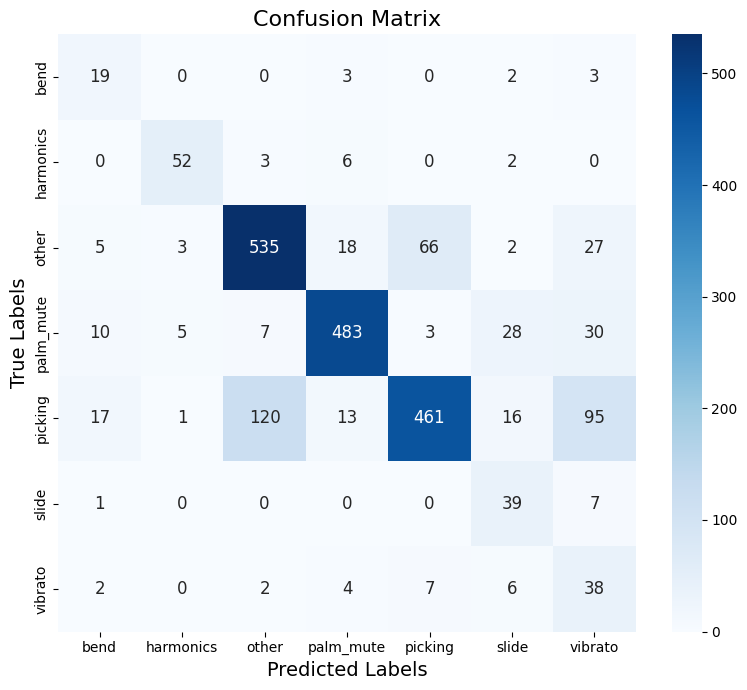

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt

# --- Configuration ---
# Path to your best-saved model file
MODEL_PATH = './models_final/best_final_model_augmented.h5'

# Paths to your pre-processed, original (non-augmented) test data
X_TEST_PATH = 'X_test_final.npy'
Y_TEST_PATH = 'y_test_final.npy'

# Path to the original training directory to get the class names in the correct order
# Make sure this points to the directory that defines the class order for training
TRAIN_DIR_FOR_LABELS = '/data/hjpark/combined_dataset_final/train'

# Output paths for visualizations
OUTPUT_DIR = './visualizations'
os.makedirs(OUTPUT_DIR, exist_ok=True)
CM_HEATMAP_PATH = os.path.join(OUTPUT_DIR, 'confusion_matrix.png')
METRICS_BAR_PATH = os.path.join(OUTPUT_DIR, 'metrics_barplot.png')

def evaluate_final_model():
    """
    Loads a trained Keras model and evaluates its performance on the holdout test set.
    Generates filtered classification report (only classes in test set) and visualizations.
    """
    # --- 1. Load Model and Test Data ---
    print("--- Loading Model and Data ---")
    try:
        print(f"Loading model from: {MODEL_PATH}")
        model = tf.keras.models.load_model(MODEL_PATH)
        
        print(f"Loading test data from: {X_TEST_PATH} and {Y_TEST_PATH}")
        X_test = np.load(X_TEST_PATH)
        y_test = np.load(Y_TEST_PATH)  # These are the ground truth integer labels
    
    except FileNotFoundError as e:
        print(f"‼️ ERROR: A required file was not found. {e}")
        print("Please ensure the model and test .npy files exist at the specified paths.")
        sys.exit(1)
    except Exception as e:
        print(f"An unexpected error occurred during loading: {e}")
        sys.exit(1)
        
    print("✅ Model and data loaded successfully.\n")

    # --- 2. Discover Class Labels for the Report ---
    try:
        # Sort the folder names alphabetically to ensure the order matches the integer labels
        target_names = sorted([d for d in os.listdir(TRAIN_DIR_FOR_LABELS) if os.path.isdir(os.path.join(TRAIN_DIR_FOR_LABELS, d))])
        print(f"Found {len(target_names)} classes from training directory: {target_names}\n")
    except FileNotFoundError:
        print(f"‼️ WARNING: Could not find training directory at '{TRAIN_DIR_FOR_LABELS}' to get class names.")
        print("The classification report will only show integer labels.")
        target_names = None

    # --- 3. Generate Predictions ---
    print("--- Generating Predictions on the Test Set ---")
    # model.predict() returns class probabilities
    y_pred_probabilities = model.predict(X_test)
    
    # Use np.argmax to get the index of the class with the highest probability
    y_pred = np.argmax(y_pred_probabilities, axis=1)
    print("✅ Predictions generated.\n")

    # --- 4. Filter to Only Classes Present in Test Set ---
    # Get unique classes that actually appear in y_test (support > 0)
    unique_test_classes = np.unique(y_test)
    print(f"Classes present in test set: {unique_test_classes}")
    
    if target_names:
        # Filter target_names to only those in unique_test_classes
        filtered_target_names = [target_names[i] for i in unique_test_classes]
        # Full labels for CM (but we'll filter the matrix)
        full_labels = list(range(len(target_names)))
    else:
        filtered_target_names = None
        full_labels = unique_test_classes  # Use integers if no names

    # --- 5. Compute Filtered Classification Report and Confusion Matrix ---
    print("--- Final Model Evaluation Report (Filtered to Test Set Classes) ---")
    
    # Classification Report (filtered by providing only unique_test_classes as labels)
    report = classification_report(y_test, y_pred, labels=unique_test_classes, target_names=filtered_target_names, zero_division=0)
    print("\nClassification Report:")
    print(report)
    
    # Confusion Matrix (full, then filter to present classes)
    cm = confusion_matrix(y_test, y_pred, labels=unique_test_classes)  # Only for present classes
    print("\nConfusion Matrix:")
    print("Matrix labels:", filtered_target_names)
    print(cm)
    print("\n(Rows: True Labels, Columns: Predicted Labels)")

    # --- 6. Visualizations ---
    
    # NEW: Abbreviate long class names for a more compact plot
    if filtered_target_names:
        abbreviated_names = {
            'alternate_picking': 'alt_pick', 'sweep_picking': 'swp_pick',
            'palm_mute': 'palm_mute', 'harmonics': 'harmonics',
            'legato': 'legato', 'picking': 'picking',
            'vibrato': 'vibrato', 'slide': 'slide',
            'bend': 'bend', 'other': 'other'
        }
        # Create a new list of labels just for plotting
        plot_labels = [abbreviated_names.get(name, name) for name in filtered_target_names]
    else:
        plot_labels = filtered_target_names

    # ADJUSTED: Figure size made more compact
    plt.figure(figsize=(8, 7))

    # ADJUSTED: Added annot_kws to increase font size of numbers inside the heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=plot_labels, yticklabels=plot_labels,
                cbar=True, annot_kws={"size": 12}) # Control font size of numbers

    # ADJUSTED: Increased font size for readability
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)

    # NEW: Added tight_layout to automatically reduce whitespace
    plt.tight_layout()
    plt.savefig(CM_HEATMAP_PATH)
    print(f"✅ Confusion matrix heatmap saved to: {CM_HEATMAP_PATH}")

if __name__ == '__main__':
    evaluate_final_model()


## Future plan: use transformers (not in scope for this submission)